# AESO Data Forecast Analysis
## File Path Check

In [1]:
ls

2021-Long-term-Outlook-data-file-updated-Aug-11.xlsx
AESO_analysis.ipynb
AESO_analysis_jun16_2022.ipynb
AESO_data.ipynb
AESO_research_2022/
EvGenFor.csv
Gen Table.csv
Gen_Table.csv
Gen_Table.xls
Untitled.ipynb
Untitled1.ipynb
annual_base.png
annual_loadshift.png
annual_nameplate.png
annualren_elsewhere.png
columnDataSource.html
summary2_base.png
summary2_loadshift.png
summary2_nameplate.png
summary2_ren_elsewhere.png
summary3_base.png
summary3_loadshift.png
summary3_nameplate.png
summary3_ren_elsewhere.png


In [2]:
# pwd

## Import Libraries

### Standard Libraries

In [3]:
# Render our plots inline
%matplotlib inline

# Libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Bokeh Library Imports

In [4]:
from bokeh.io import output_notebook
# Required to run once for bokeh to work properly.
output_notebook()

Loading BokehJS ...

In [5]:
# Bokeh library imports.
from bokeh.io import (
    show,
    curdoc,
    push_notebook,
    export_png
)
from bokeh.plotting import figure
from bokeh.models import (
    DatetimeTickFormatter,
    NumeralTickFormatter,
    ColumnDataSource,
    Range1d,
    RangeTool,
    RangeSlider,
    HoverTool,
    Slider,
    CustomJS,
    Whisker,
    LinearAxis
)
from bokeh.models.widgets import DateRangeSlider
from bokeh.layouts import column, row, widgetbox # not using yet
from bokeh.transform import dodge

### Ipywidget Library Imports

In [6]:
# ipywidget library imports
from ipywidgets import interact, IntSlider, Layout, Label, HBox, VBox

In [7]:
# Creates variable with cwd
path = os.getcwd()

print(path)

/Users/mathew/Desktop/School Work/Summer_Research_2022/jupyter_notebook


# Historical Hourly Generation Data

## Objective of Section:

1. Open AESO historical hourly data.
2. Clean data.
3. Create hourly average capacity factors for renewable, *Wind and Solar*.
4. Combine hourly average capacity factors for renewables into a single dataframe.

### Open Raw Data Files

Original 'Gen Table.csv' file was opened in excel where titles were split across the first two rows of each column.
Titles were combined and excess title row eliminated in excel before exporting as 'Gen_Table.csv' and opening
in the cell below.  This file modification was made outside this notebook, and anyone looking to reproduce the results here would have make similar modifications to the original 'Gen Table.csv' file.

The original file can be found here [Historical Generation Data](https://public.tableau.com/app/profile/market.analytics/viz/AnnualStatistics_16161854228350/Introduction)

In [8]:
# 'Gen Table.csv', historical hourly data

# Read and generate DataFrame from file
gen_hist = pd.read_csv(path + '/Gen_Table.csv')

# Find properties
print(type(gen_hist))

display(gen_hist)

<class 'pandas.core.frame.DataFrame'>


/var/folders/lv/_brj3nmd2rb3b5n0hfm2l8fc0000gn/T/ipykernel_85007/4043333214.py:4: DtypeWarning: Columns (22,23,24,25,26,27,28,29,30,43,44,52,53,54,58,59,60) have mixed types. Specify dtype option on import or set low_memory=False.
  gen_hist = pd.read_csv(path + '/Gen_Table.csv')


,Date - MST,Coal Capacity,Coal Available,Coal Utilized,Coal Avg. Availability Factor,Coal Avg. Availability Utilization,Coal Avg. Capacity Factor,Cogeneration Capacity,Cogeneration Available,Cogeneration Utilized,...,Storage Utilized,Storage Avg. Availability Factor,Storage Avg. Availability Utilization,Storage Avg. Capacity Factor,Wind Capacity,Wind Available,Wind Utilized,Wind Avg. Availability Factor,Wind Avg. Availability Utilization,Wind Avg. Capacity Factor
0,1/1/2015 12:00:00 AM,"6,271","5,609","5,021",89.44%,89.50%,80.10%,"4,533","2,761","1,192",...,NaN,NaN,NaN,NaN,"1,434",132,863,9.21%,653.80%,60.20%
1,1/1/2015 1:00:00 AM,"6,271","5,487","4,879",87.50%,88.90%,77.80%,"4,533","2,769","1,215",...,NaN,NaN,NaN,NaN,"1,434",132,926,9.21%,701.70%,64.60%
2,1/1/2015 2:00:00 AM,"6,271","5,826","4,689",92.90%,80.50%,74.80%,"4,533","2,775","1,067",...,NaN,NaN,NaN,NaN,"1,434",132,824,9.21%,624.00%,57.40%
3,1/1/2015 3:00:00 AM,"6,271","5,826","4,554",92.90%,78.20%,72.60%,"4,533","2,775","1,050",...,NaN,NaN,NaN,NaN,"1,434",132,765,9.21%,579.50%,53.30%
4,1/1/2015 4:00:00 AM,"6,271","5,586","4,465",89.08%,79.90%,71.20%,"4,533","2,782","1,052",...,NaN,NaN,NaN,NaN,"1,434",132,824,9.21%,624.30%,57.50%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62780,2/28/2022 8:00:00 PM,"1,266","1,266","1,265",100.00%,99.90%,99.90%,"5,247","3,529","1,969",...,0.0,100.00%,0.00%,0.00%,"2,269","2,059",597,90.74%,29.00%,26.30%
62781,2/28/2022 9:00:00 PM,"1,266","1,266","1,264",100.00%,99.90%,99.90%,"5,247","3,537","1,958",...,0.0,100.00%,0.00%,0.00%,"2,269","2,059",470,90.74%,22.80%,20.70%
62782,2/28/2022 10:00:00 PM,"1,266","1,266","1,265",100.00%,99.90%,99.90%,"5,247","3,533","1,958",...,0.0,100.00%,0.00%,0.00%,"2,269","2,059",310,90.74%,15.10%,13.70%
62783,2/28/2022 11:00:00 PM,"1,266","1,266","1,264",100.00%,99.80%,99.80%,"5,247","3,522","1,918",...,0.0,100.00%,0.00%,0.00%,"2,269","2,059",112,90.74%,5.50%,5.00%


### Run Programmer Test Code

**Use programmer test code to get an idea of the available data.**

<code style="background:yellow;color:black">Programmer test coding will appear throughout notebook as required.</code>

This section is the initial viewing of our data.

In [9]:
gen_hist.describe()

,Dual Fuel Capacity,Dual Fuel Available,Dual Fuel Utilized,Hydro Capacity,Hydro Available,Hydro Utilized,Other Capacity,Other Available,Other Utilized,Simple Cycle Utilized,Solar Capacity,Solar Available,Solar Utilized,Storage Capacity,Storage Available,Storage Utilized
count,34969.000000,34969.000000,34969.000000,62785.0,62785.000000,62785.000000,62785.000000,62785.000000,62785.000000,62785.000000,37129.000000,37129.000000,37129.000000,11642.000000,11642.000000,11642.000000
mean,473.444050,450.279791,174.092396,894.0,705.116079,211.319025,385.597547,145.595190,69.104229,226.499403,124.682809,95.157586,17.568666,35.031781,30.662773,0.060986
std,350.011902,346.770913,166.775877,0.0,87.097257,98.287391,5.311723,23.922422,15.310327,182.698975,177.501474,118.079420,47.688897,11.100583,12.845938,0.713288
min,155.000000,0.000000,0.000000,894.0,255.000000,41.000000,367.000000,18.000000,13.000000,0.000000,15.000000,0.000000,0.000000,10.000000,0.000000,0.000000
25%,155.000000,155.000000,56.000000,894.0,659.000000,140.000000,381.000000,133.000000,60.000000,44.000000,15.000000,15.000000,0.000000,30.000000,23.000000,0.000000
50%,155.000000,155.000000,123.000000,894.0,716.000000,191.000000,384.000000,152.000000,71.000000,215.000000,15.000000,15.000000,0.000000,30.000000,30.000000,0.000000
75%,930.000000,930.000000,241.000000,894.0,761.000000,259.000000,392.000000,162.000000,79.000000,356.000000,240.000000,127.000000,8.000000,50.000000,46.000000,0.000000
max,940.000000,940.000000,940.000000,894.0,865.000000,696.000000,395.000000,201.000000,132.000000,884.000000,777.000000,351.000000,311.000000,50.000000,50.000000,25.000000


In [10]:
gen_hist.columns

Index(['Date - MST', 'Coal Capacity', 'Coal Available', 'Coal Utilized',
       'Coal Avg. Availability Factor', 'Coal Avg. Availability Utilization',
       'Coal Avg. Capacity Factor', 'Cogeneration Capacity',
       'Cogeneration Available', 'Cogeneration Utilized',
       'Cogeneration Avg. Availability Factor',
       'Cogeneration Avg. Availability Utilization',
       'Cogeneration Avg. Capacity Factor', 'Combined Cycle Capacity',
       'Combined Cycle Available', 'Combined Cycle Utilized',
       'Combined Cycle Avg. Availability Factor',
       'Combined Cycle Avg. Availability Utilization',
       'Combined Cycle Avg. Capacity Factor', 'Dual Fuel Capacity',
       'Dual Fuel Available', 'Dual Fuel Utilized',
       'Dual Fuel Avg. Availability Factor',
       'Dual Fuel Avg. Availability Utilization',
       'Dual Fuel Avg. Capacity Factor', 'Gas Fired Steam Capacity',
       'Gas Fired Steam Available', 'Gas Fired Steam Utilized',
       'Gas Fired Steam Avg. Availability F

In [11]:
gen_hist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62785 entries, 0 to 62784
Data columns (total 67 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Date - MST                                     62785 non-null  object 
 1   Coal Capacity                                  62785 non-null  object 
 2   Coal Available                                 62785 non-null  object 
 3   Coal Utilized                                  62785 non-null  object 
 4   Coal Avg. Availability Factor                  62785 non-null  object 
 5   Coal Avg. Availability Utilization             62785 non-null  object 
 6   Coal Avg. Capacity Factor                      62785 non-null  object 
 7   Cogeneration Capacity                          62785 non-null  object 
 8   Cogeneration Available                         62785 non-null  object 
 9   Cogeneration Utilized                          627

### Begin Data Cleaning

Section also begins restructing data into pandas dataframes.

In [12]:
# Fill the 'Nan' values with '0's.
gen_hist.fillna(value=0, axis=1, inplace=True)

In [13]:
# Programmer test code.
gen_hist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62785 entries, 0 to 62784
Data columns (total 67 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Date - MST                                     62785 non-null  object
 1   Coal Capacity                                  62785 non-null  object
 2   Coal Available                                 62785 non-null  object
 3   Coal Utilized                                  62785 non-null  object
 4   Coal Avg. Availability Factor                  62785 non-null  object
 5   Coal Avg. Availability Utilization             62785 non-null  object
 6   Coal Avg. Capacity Factor                      62785 non-null  object
 7   Cogeneration Capacity                          62785 non-null  object
 8   Cogeneration Available                         62785 non-null  object
 9   Cogeneration Utilized                          62785 non-null

In [14]:
# Check column type.  Programmer test code.
print(gen_hist['Date - MST'].dtypes)

object


In [15]:
# Convert series 's' to DataFrame
s = pd.to_datetime(gen_hist['Date - MST']) 
s = s.to_frame(name='Date')

# Test code to visualize.
print(s)

                     Date
0     2015-01-01 00:00:00
1     2015-01-01 01:00:00
2     2015-01-01 02:00:00
3     2015-01-01 03:00:00
4     2015-01-01 04:00:00
...                   ...
62780 2022-02-28 20:00:00
62781 2022-02-28 21:00:00
62782 2022-02-28 22:00:00
62783 2022-02-28 23:00:00
62784 2022-03-01 00:00:00

[62785 rows x 1 columns]


In [16]:
# Create separate columns for date specifics.
s['year'] = s['Date'].dt.year
s['month'] = s['Date'].dt.month
s['day'] = s['Date'].dt.day
s['hour'] = s['Date'].dt.hour

# Convert 'hour' column to 'HourEnding' column
# to match LTO sheet headings.
s['HourEnding'] = s['hour'] + 1
del s['hour']

print(s)

                     Date  year  month  day  HourEnding
0     2015-01-01 00:00:00  2015      1    1           1
1     2015-01-01 01:00:00  2015      1    1           2
2     2015-01-01 02:00:00  2015      1    1           3
3     2015-01-01 03:00:00  2015      1    1           4
4     2015-01-01 04:00:00  2015      1    1           5
...                   ...   ...    ...  ...         ...
62780 2022-02-28 20:00:00  2022      2   28          21
62781 2022-02-28 21:00:00  2022      2   28          22
62782 2022-02-28 22:00:00  2022      2   28          23
62783 2022-02-28 23:00:00  2022      2   28          24
62784 2022-03-01 00:00:00  2022      3    1           1

[62785 rows x 5 columns]


In [17]:
# Joins columns of the two dataframes into one
s = s.join(gen_hist)

# Comment-in below code to test above operation.
# print(s)

In [18]:
# EXAMPLE SNIPPET: df.drop("column_name", axis=1, inplace=True)
# drop the original 'Date - Time' column
# axis=1 indicates column drop
# inplace=True indicates not to make a new dataframe after the drop

s.drop("Date - MST", axis=1, inplace=True)

# Comment-in below code to test above operations
# print(s)

In [19]:
# Update original 'gen_hist' variable and delete s.
gen_hist = s

del s

# Comment-in code below to test above operations
# print(gen_hist)

In [20]:
# Convert the necessary object columns to floats, stipping off the %.
gen_hist['Wind Avg. Capacity Factor'] = gen_hist['Wind Avg. Capacity Factor'].\
                                                str.rstrip('%').\
                                                astype('float')\
                                                / 100.0
gen_hist['Solar Avg. Capacity Factor'] = gen_hist['Solar Avg. Capacity Factor'].\
                                                str.rstrip('%').\
                                                astype('float')\
                                                / 100.0
gen_hist['Storage Avg. Capacity Factor'] = gen_hist['Storage Avg. Capacity Factor'].\
                                                str.rstrip('%').\
                                                astype('float')\
                                                / 100.0

# View the above code's results.
# Comment-in below code to test above operations

# gen_hist.info()
# print(gen_hist)

In [21]:
display(gen_hist)

,Date,year,month,day,HourEnding,Coal Capacity,Coal Available,Coal Utilized,Coal Avg. Availability Factor,Coal Avg. Availability Utilization,...,Storage Utilized,Storage Avg. Availability Factor,Storage Avg. Availability Utilization,Storage Avg. Capacity Factor,Wind Capacity,Wind Available,Wind Utilized,Wind Avg. Availability Factor,Wind Avg. Availability Utilization,Wind Avg. Capacity Factor
0,2015-01-01 00:00:00,2015,1,1,1,"6,271","5,609","5,021",89.44%,89.50%,...,0,0,0,NaN,"1,434",132,863,9.21%,653.80%,0.602
1,2015-01-01 01:00:00,2015,1,1,2,"6,271","5,487","4,879",87.50%,88.90%,...,0,0,0,NaN,"1,434",132,926,9.21%,701.70%,0.646
2,2015-01-01 02:00:00,2015,1,1,3,"6,271","5,826","4,689",92.90%,80.50%,...,0,0,0,NaN,"1,434",132,824,9.21%,624.00%,0.574
3,2015-01-01 03:00:00,2015,1,1,4,"6,271","5,826","4,554",92.90%,78.20%,...,0,0,0,NaN,"1,434",132,765,9.21%,579.50%,0.533
4,2015-01-01 04:00:00,2015,1,1,5,"6,271","5,586","4,465",89.08%,79.90%,...,0,0,0,NaN,"1,434",132,824,9.21%,624.30%,0.575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62780,2022-02-28 20:00:00,2022,2,28,21,"1,266","1,266","1,265",100.00%,99.90%,...,0.0,100.00%,0.00%,0.0,"2,269","2,059",597,90.74%,29.00%,0.263
62781,2022-02-28 21:00:00,2022,2,28,22,"1,266","1,266","1,264",100.00%,99.90%,...,0.0,100.00%,0.00%,0.0,"2,269","2,059",470,90.74%,22.80%,0.207
62782,2022-02-28 22:00:00,2022,2,28,23,"1,266","1,266","1,265",100.00%,99.90%,...,0.0,100.00%,0.00%,0.0,"2,269","2,059",310,90.74%,15.10%,0.137
62783,2022-02-28 23:00:00,2022,2,28,24,"1,266","1,266","1,264",100.00%,99.80%,...,0.0,100.00%,0.00%,0.0,"2,269","2,059",112,90.74%,5.50%,0.050


### Create Hourly Average Renewable Generation Capacity Factors

#### Find Wind Hourly Average Capacity Factor

- Capacity factor standard deviations are also found across each hour
- Capacity factor min and max also found across each hour

In [22]:
# Use .groupby to find "Wind Avg. Capacity Factor" for each hour in the year using
# historical hourly Capacity Factor data in gen_hist from across several years.
temp1 = gen_hist.groupby(["month", "day", "HourEnding"]).mean()["Wind Avg. Capacity Factor"].copy()

# Converts series to dataframe.
temp1 = temp1.to_frame()

# Create a capacity factor Standard Deviation column in temp1. 
temp1["Wind Avg. Capacity Factor std"]\
        = gen_hist.groupby(["month", "day", "HourEnding"]).std()["Wind Avg. Capacity Factor"]

# Create a min wind capacity factor column in temp1.
temp1["Wind Capacity Factor min"]\
        = gen_hist.groupby(["month", "day", "HourEnding"])["Wind Avg. Capacity Factor"].min()

# Create a max wind capacity factor column in temp1.
temp1["Wind Capacity Factor max"]\
        = gen_hist.groupby(["month", "day", "HourEnding"])["Wind Avg. Capacity Factor"].max()

# Coverts indices into dataframe columns.
temp1.reset_index(inplace=True)

# Create a wind capacity factor using 2020 data.
temp2 = gen_hist[gen_hist["year"] == 2020].copy()

temp2.reset_index(inplace=True)

# Combine the 2020 capacity factors with temp1
temp1["Wind Capacity Factor 2020"] = temp2["Wind Avg. Capacity Factor"]

del temp2

# Use the code below to test/check results of above operations.

# print(temp1)
# display(temp1)
# temp1.shape


#### Find Solar Hourly Average Capacity Factor

- All solar zero values removed and ignored for the sake of averaging the solar capacity factor.
- Zero values were removed with the assumption that they occured at night when no sunlight was available.
- Capacity factor standard deviations are also found across each hour
- Capacity factor min and max also found across each hour

In [23]:
# Create variable out of dataframe to manipulate
s = gen_hist.copy()

# EXAMPLE CODE: df.drop(df.index[df['Col1'] == 0], inplace=True)
# Remove all rows where 'Solar Capacity' was zero to give an
# accurate mean of the Solar Capacity Factor
s.drop(s.index[s['Solar Capacity'] == 0], inplace=True)

# Comment-in below code to test above operations
# s.info()
# print(s.shape)
# display(s[{'Date', "Solar Capacity"}])

# Use .groupby to find "Solar Avg. Capacity Factor" for each hour in the year using
# historical hourly Capacity Factor data in gen_hist from across several years.
temp2 = s.groupby(["month", "day", "HourEnding"]).mean()["Solar Avg. Capacity Factor"]

# Converts series to dataframe.
temp2 = temp2.to_frame()

# Create a capacity factor Standard Deviation column in temp2.
temp2["Solar Avg. Capacity Factor std"]\
        = s.groupby(["month", "day", "HourEnding"]).std()["Solar Avg. Capacity Factor"]

# Create a min solar capacity factor column in temp2.
temp2["Solar Capacity Factor min"]\
        = s.groupby(["month", "day", "HourEnding"])["Solar Avg. Capacity Factor"].min()

# Create a max solar capacity factor column in temp2.
temp2["Solar Capacity Factor max"]\
        = s.groupby(["month", "day", "HourEnding"])["Solar Avg. Capacity Factor"].max()

# Coverts indices into dataframe columns.
temp2.reset_index(inplace=True)

# Create a solar capacity factor using 2020 data.
temp3 = gen_hist[gen_hist["year"] == 2020].copy()

temp3.reset_index(inplace=True)

# Combine the 2020 capacity factors with temp1
temp2["Solar Capacity Factor 2020"] = temp3["Solar Avg. Capacity Factor"]

del temp3

# Comment-in below programmer test code to test/check results of above operations.

# print(temp2)
# display(temp2)
# temp2.shape
# print(temp2.iloc[13])

In [24]:
temp2['Wind Avg. Capacity Factor'] = temp1['Wind Avg. Capacity Factor']
temp2["Wind Avg. Capacity Factor std"] = temp1["Wind Avg. Capacity Factor std"]
temp2["Wind Capacity Factor min"] = temp1["Wind Capacity Factor min"]
temp2["Wind Capacity Factor max"] = temp1["Wind Capacity Factor max"]
temp2["Wind Capacity Factor 2020"] = temp1["Wind Capacity Factor 2020"]

# Programmer test code only.
# display(temp2)

# Create the Renewable Capacity Factor dataframe
cf = temp2.copy()

# print(cf).  Programmer test code only.
display(cf)

,month,day,HourEnding,Solar Avg. Capacity Factor,Solar Avg. Capacity Factor std,Solar Capacity Factor min,Solar Capacity Factor max,Solar Capacity Factor 2020,Wind Avg. Capacity Factor,Wind Avg. Capacity Factor std,Wind Capacity Factor min,Wind Capacity Factor max,Wind Capacity Factor 2020
0,1,1,1,0.0,0.0,0.0,0.0,0.0,0.539125,0.227798,0.121,0.825,0.493
1,1,1,2,0.0,0.0,0.0,0.0,0.0,0.560375,0.228928,0.134,0.856,0.440
2,1,1,3,0.0,0.0,0.0,0.0,0.0,0.544500,0.224885,0.121,0.861,0.404
3,1,1,4,0.0,0.0,0.0,0.0,0.0,0.546125,0.220870,0.127,0.833,0.394
4,1,1,5,0.0,0.0,0.0,0.0,0.0,0.546875,0.225787,0.127,0.812,0.317
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,12,31,20,0.0,0.0,0.0,0.0,0.0,0.428857,0.307075,0.074,0.770,0.490
8780,12,31,21,0.0,0.0,0.0,0.0,0.0,0.450429,0.298409,0.104,0.729,0.613
8781,12,31,22,0.0,0.0,0.0,0.0,0.0,0.483000,0.290872,0.158,0.756,0.756
8782,12,31,23,0.0,0.0,0.0,0.0,0.0,0.520286,0.283724,0.145,0.832,0.832


In [25]:
# Rename dataframe column.
cf.rename(columns = {"HourEnding":"Hour Ending"}, inplace=True)

In [26]:
# Delete all temporary dataframes to avoid excess objects sitting unused in memory.
del temp1
del temp2
del s

# Forecasted Hourly Loading

## Objectives of Section:

1. Open applicable excel sheets from AESO website,
2. Create forecasted hourly EV loading for *Clean-Tech* scenario.
3. Create forecasted hourly expected renewable generation capacity.
4. Use hourly capacity factor obtained in the previous section to generate expected hourly renewable generation.

Excel File from AESO: [2021 Long Term Outlook](https://www.aeso.ca/assets/2021-Long-term-Outlook-data-file-updated-Aug-11.xlsx)

<code style="background:yellow;color:black">ref and ct will be used in column headings to indicate Reference Case and Clean-Tech Case respectively</code>

## Open all excel file sheets to be used.

Create dataframes out of each excel sheet to be used for this section.

### Electric Vehicle Forecast Data

In [27]:
# EXAMPLE CODE: df_sheet_index = pd.read_excel('sample.xlsx', sheet_name=1)

# Location of AESO file at the time of writing this code.
url = "https://www.aeso.ca/assets/2021-Long-term-Outlook-data-file-updated-Aug-11.xlsx"

evfor = pd.read_excel(url, sheet_name="Electric Vehicle Forecast")

In [28]:
# print(evfor)
evfor.shape

(42, 3)

In [29]:
display(evfor)

,Calendar Year,Scenario,Number of Electric Vehicles
0,2021,1 Reference Case/Robust/Stagnant,1.513070e+04
1,2022,1 Reference Case/Robust/Stagnant,1.625634e+04
2,2023,1 Reference Case/Robust/Stagnant,1.746573e+04
3,2024,1 Reference Case/Robust/Stagnant,1.876508e+04
4,2025,1 Reference Case/Robust/Stagnant,2.016110e+04
5,2026,1 Reference Case/Robust/Stagnant,2.166098e+04
6,2027,1 Reference Case/Robust/Stagnant,2.327244e+04
7,2028,1 Reference Case/Robust/Stagnant,2.500379e+04
8,2029,1 Reference Case/Robust/Stagnant,2.686393e+04
9,2030,1 Reference Case/Robust/Stagnant,3.169944e+04


In [30]:
evfor.describe()

,Calendar Year,Number of Electric Vehicles
count,42.000000,4.200000e+01
mean,2031.000000,3.098425e+05
std,6.128701,4.786773e+05
min,2021.000000,1.513070e+04
25%,2026.000000,2.807281e+04
50%,2031.000000,1.008916e+05
75%,2036.000000,2.878309e+05
max,2041.000000,1.957734e+06


In [31]:
evfor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Calendar Year                42 non-null     int64  
 1   Scenario                     42 non-null     object 
 2   Number of Electric Vehicles  42 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.1+ KB


In [32]:
evfor.columns

Index(['Calendar Year', 'Scenario', 'Number of Electric Vehicles'], dtype='object')

### Forecasted Generation Data by Fuel Type

In [33]:
# Forecasted Generation Data by Fuel Type.
genfor = pd.read_excel(url, sheet_name="Generation data by fuel type")

In [34]:
genfor.shape

(5040, 5)

In [35]:
display(genfor)

,Calendar Year,Scenario,Fuel Type,Category,Value
0,2021,1 Reference Case,Combined Cycle,Output (GWh),1.062828e+04
1,2021,1 Reference Case,Coal,Output (GWh),9.545706e+03
2,2021,1 Reference Case,Cogeneration,Output (GWh),3.295556e+04
3,2021,1 Reference Case,Coal to Gas - Steam Boiler,Output (GWh),1.127525e+04
4,2021,1 Reference Case,Solar/Storage,Output (GWh),7.340163e+00
...,...,...,...,...,...
5035,2041,4 Stagnant Scenario,Other,Carbon Emissions (Tonnes),NaN
5036,2041,4 Stagnant Scenario,Simple Cycle,Carbon Emissions (Tonnes),1.853832e+06
5037,2041,4 Stagnant Scenario,Solar,Carbon Emissions (Tonnes),NaN
5038,2041,4 Stagnant Scenario,Storage,Carbon Emissions (Tonnes),NaN


In [36]:
genfor.describe()

,Calendar Year,Value
count,5040.000000,4.126000e+03
mean,2031.000000,3.839258e+05
std,6.055902,1.517402e+06
min,2021.000000,-2.548058e+03
25%,2026.000000,4.534435e-01
50%,2031.000000,8.940000e+02
75%,2036.000000,3.976300e+03
max,2041.000000,1.240434e+07


In [37]:
genfor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5040 entries, 0 to 5039
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Calendar Year  5040 non-null   int64  
 1   Scenario       5040 non-null   object 
 2   Fuel Type      5040 non-null   object 
 3   Category       5040 non-null   object 
 4   Value          4126 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 197.0+ KB


In [38]:
genfor.columns

Index(['Calendar Year', 'Scenario', 'Fuel Type', 'Category', 'Value'], dtype='object')

### Hourly EV Loading (MWH), Reference Case

In [39]:
# EV hourly data forecast for Reference Scenario.
# Includes other data which has to be wrangled.

evhr = pd.read_excel(url, sheet_name="Reference Case Hourly AIL")


In [40]:
evhr.shape

(186960, 8)

In [41]:
display(evhr)

,Calendar Date,Hour Ending,AIL (MWh)*,AIL_Raw (MWh)*,Less than 5 MW DER_gas (MWh)*,Less than 5 MW DER_PV (MWh)*,Less than 5 MW DER_Wind (MWh)*,EV Load (MWh)*
0,2021-01-01,1,9325.605426,9370.068492,-24.159188,0.000000,-32.396111,12.092234
1,2021-01-01,2,9203.185949,9253.657741,-24.694282,0.000000,-33.920634,8.143125
2,2021-01-01,3,9130.521087,9185.157278,-25.138566,0.000000,-34.120225,4.622601
3,2021-01-01,4,9103.123785,9160.286283,-25.062748,0.000000,-34.120225,2.020475
4,2021-01-01,5,9112.99721,9164.864530,-24.390170,0.000000,-34.120225,6.643075
...,...,...,...,...,...,...,...,...
186955,2042-04-30,21,10885.88029,10439.690840,-54.120304,-29.804697,-18.927394,549.041961
186956,2042-04-30,22,10902.85033,10456.512060,-52.662007,-9.934899,-11.897219,520.832384
186957,2042-04-30,23,10772.02877,10356.078100,-52.045862,0.000000,-2.163131,470.159624
186958,2042-04-30,24,10367.9366,10036.250140,-49.728147,0.000000,-13.519567,394.934084


In [42]:
# Drop the last dataframe row containing useless entries.
evhr.drop(evhr.tail(1).index, axis=0, inplace=True)

In [43]:
display(evhr)

,Calendar Date,Hour Ending,AIL (MWh)*,AIL_Raw (MWh)*,Less than 5 MW DER_gas (MWh)*,Less than 5 MW DER_PV (MWh)*,Less than 5 MW DER_Wind (MWh)*,EV Load (MWh)*
0,2021-01-01,1,9325.605426,9370.068492,-24.159188,0.000000,-32.396111,12.092234
1,2021-01-01,2,9203.185949,9253.657741,-24.694282,0.000000,-33.920634,8.143125
2,2021-01-01,3,9130.521087,9185.157278,-25.138566,0.000000,-34.120225,4.622601
3,2021-01-01,4,9103.123785,9160.286283,-25.062748,0.000000,-34.120225,2.020475
4,2021-01-01,5,9112.99721,9164.864530,-24.390170,0.000000,-34.120225,6.643075
...,...,...,...,...,...,...,...,...
186954,2042-04-30,20,10754.29144,10464.827380,-55.059350,-129.153687,-19.468176,493.145206
186955,2042-04-30,21,10885.88029,10439.690840,-54.120304,-29.804697,-18.927394,549.041961
186956,2042-04-30,22,10902.85033,10456.512060,-52.662007,-9.934899,-11.897219,520.832384
186957,2042-04-30,23,10772.02877,10356.078100,-52.045862,0.000000,-2.163131,470.159624


In [44]:
evhr.describe()

,AIL_Raw (MWh)*,Less than 5 MW DER_gas (MWh)*,Less than 5 MW DER_PV (MWh)*,Less than 5 MW DER_Wind (MWh)*,EV Load (MWh)*
count,186959.000000,186959.000000,186959.000000,186959.000000,186959.000000
mean,10444.091092,-37.019329,-87.405931,-16.587042,45.693675
std,813.350279,9.496950,164.648553,15.828546,66.663378
min,8083.758933,-78.399841,-746.371902,-48.412856,0.902940
25%,9850.903588,-43.522958,-97.744769,-32.120508,9.462920
50%,10450.431260,-36.141007,0.000000,-11.196784,21.898472
75%,11022.851730,-29.779493,0.000000,-1.485503,50.505934
max,12665.231330,-14.353983,0.000000,0.000000,549.041961


In [45]:
evhr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186959 entries, 0 to 186958
Data columns (total 8 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Calendar Date                   186959 non-null  datetime64[ns]
 1   Hour Ending                     186959 non-null  object        
 2   AIL (MWh)*                      186959 non-null  object        
 3   AIL_Raw (MWh)*                  186959 non-null  float64       
 4    Less than 5 MW DER_gas (MWh)*  186959 non-null  float64       
 5   Less than 5 MW DER_PV (MWh)*    186959 non-null  float64       
 6   Less than 5 MW DER_Wind (MWh)*  186959 non-null  float64       
 7   EV Load (MWh)*                  186959 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 11.4+ MB


In [46]:
evhr.columns

Index(['Calendar Date', 'Hour Ending', 'AIL (MWh)*', 'AIL_Raw (MWh)*',
       ' Less than 5 MW DER_gas (MWh)*', 'Less than 5 MW DER_PV (MWh)*',
       'Less than 5 MW DER_Wind (MWh)*', 'EV Load (MWh)*'],
      dtype='object')

## Create forecasted hourly EV loading for *Clean-Tech* scenario.

In [47]:
# Create copy dataframes to manipulate

# Create a dataframe containing the reference case EV numbers.
a  = evfor[evfor["Scenario"] == "1 Reference Case/Robust/Stagnant"].copy()
a.rename(columns = {"Number of Electric Vehicles":"Number of Electric Vehicles ref"}, inplace = True)

# Create a dataframe containing the Clean-Tech case EV numbers
b = evfor[evfor["Scenario"] == "2 Clean-Tech Scenario"].copy()
b.rename(columns = {"Number of Electric Vehicles":"Number of Electric Vehicles ct"}, inplace = True)

# Comment-in below code to display above results for a check.
# display(a)
# display(b)

# Add Clean-Tech EV numbers in column beside Reference EV numbers
# Drop the scenario column
a["Number of Electric Vehicles ct"] = b["Number of Electric Vehicles ct"].to_numpy()
a.drop(columns="Scenario", inplace=True)

# Create a ratio column of Clean-Tech EV to Reference EV numbers
a["EV ratio multiplier"] = a["Number of Electric Vehicles ct"] / a["Number of Electric Vehicles ref"]

# Create a final dataframe to use for EV ratio multiplication
# and delete the variable objects.
ev_mult = a.copy()
del a
del b

# Comment-in below programmer test code to display above result for a check.
# display(ev_mult)

In [48]:
# Check column type.
print(evhr['Calendar Date'].dtypes)

datetime64[ns]


In [49]:
# Convert series 's' to DataFrame
s = evhr["Calendar Date"].copy()
s = s.to_frame(name="Date")

# print(s)

# Create separate columns for date specifics.
s['year'] = s['Date'].dt.year
s['month'] = s['Date'].dt.month
s['day'] = s['Date'].dt.day

# print(s)
# display(s)

# Joins columns of the two dataframes into one
s = s.join(evhr)

# print(s)
# display(s)

# Remove the rows for year 2042 since we don't have EV Load ratio multiplier
# data for this year.
s = s.loc[s["year"] != 2042].copy()

# display(s)

In [50]:
# Update original 'evhr' variable.
evhr = s.copy()

# Rename column
evhr.rename(columns = {"EV Load (MWh)*":"EV Load ref (MWh)"}, inplace = True)

# Programmer test code.
# print(evhr)
# display(evhr)

In [51]:
# Delete DataFrame variable from above.
del s

In [52]:
# Find Clean-Tech EV loading.

# Dataframes required:  evhr, ev_mult

# Rename year column to match column in evhr
ev_mult.rename(columns = {"Calendar Year":"year"}, inplace=True)

# display(ev_mult)
# display(evhr)

# Join ev_mult with evhr on year column.
# Note:  This cell cannot be re-ran without resetting evhr variable
# due to the change below.
evhr = evhr.join(ev_mult.set_index("year"), on="year")

# display(evhr)

In [53]:
# This code is just here to test the results from the above 
# manipulations.  A test across a few cells shows agreement with
# the applicable "EV ratio multiplier" on several years.
# This code is NOT required to run the program.

# display(evhr)
# display(evhr.loc[76428])

## Extrapolate Clean-Tech Scenario Hourly EV Load Data

**EV Clean-Tech Hourly Load Assumptions**

EV Clean-Tech Loading projection has been extrapolated by assuming that the increased hourly loading
would be directly proportional to increase in the number of EVs in the market, compared against the Reference 
scenario.  It is further assumed that the daily loading pattern does not change under this overall EV
increase, following the identical hourly loading pattern of the Reference case multiplied by the magnitude increase
EVs.

In [54]:
# Extrapolate hourly Clean-Tech EV loading, assuming a direct proportional relationship to number of EVs.
evhr["EV Load ct (MWh)"] = evhr["EV Load ref (MWh)"] * evhr["EV ratio multiplier"]

# display(evhr)

## Forecast Renewable Gen. Capacity and Hourly Gen. Output

**Assumptions and methods used for this section**

We will use "Capacity Begin Year (MW)" data (from DataFrame genfor) for each year and assume that this generation is constant throughout the entire year in question.  New generation data will be assumed to come online Jan 1 of each year, inline with the "Capacity Begine Year (MW)".  Although this does not account for generation capacity that comes online throughout the year, we consider this to be a good approximation for this analysis.

Historical capacity factor average (DataFrame cf) will be used to provide hourly generation ouput for renewables.  Although this does not account for outliers (ie. days the wind simply does not blow or wind capacity hit 95%), this will be considered a good approximation to project hourly renewable generation output against capacity.  This assumption can be achieved since renewables are generally dispatched to the grid, through the power pool, at $0.  This dispatching practice indicates that generation of renewables (Wind and Solar) will be unaffected by rising Carbon Taxes.  Similar logic is applied to why historical thermal generation average capacity factors cannot be used to describe future thermal generation.

Historical capacity factor min and max (DataFrame cf) will be used to provide an hourly generation output range for renewables.  These will be the min and max capacity factors from the 2016 to 2021 actual hourly data.  This will be used to visually represent where our average falls. 

Finally, AESO describes a generation "Fuel Type" of "Solar/Storage" (DataFrame genfor) whose contributions to the grid are minimal and will be ignored.  "Fuel Type" under consideration for renewables will be "Wind" and "Solar".

In [55]:
# This entire cell is to provide the programmer information to code the next cell.  Not required to run the program.
display(genfor)

list1 = pd.unique(genfor["Scenario"])
list2 = pd.unique(genfor["Category"])
list3 = pd.unique(genfor["Fuel Type"])

print(list1)
print(list2)
print(list3)

del list1
del list2
del list3

,Calendar Year,Scenario,Fuel Type,Category,Value
0,2021,1 Reference Case,Combined Cycle,Output (GWh),1.062828e+04
1,2021,1 Reference Case,Coal,Output (GWh),9.545706e+03
2,2021,1 Reference Case,Cogeneration,Output (GWh),3.295556e+04
3,2021,1 Reference Case,Coal to Gas - Steam Boiler,Output (GWh),1.127525e+04
4,2021,1 Reference Case,Solar/Storage,Output (GWh),7.340163e+00
...,...,...,...,...,...
5035,2041,4 Stagnant Scenario,Other,Carbon Emissions (Tonnes),NaN
5036,2041,4 Stagnant Scenario,Simple Cycle,Carbon Emissions (Tonnes),1.853832e+06
5037,2041,4 Stagnant Scenario,Solar,Carbon Emissions (Tonnes),NaN
5038,2041,4 Stagnant Scenario,Storage,Carbon Emissions (Tonnes),NaN


['1 Reference Case' '2 Clean-Tech Scenario' '3 Robust Scenario'
 '4 Stagnant Scenario']
['Output (GWh)' 'Capacity Begin Year (MW)' 'Capacity End Year (MW)'
 'Capacity Factor' 'Carbon Emissions (Tonnes)']
['Combined Cycle' 'Coal' 'Cogeneration' 'Coal to Gas - Steam Boiler'
 'Solar/Storage' 'Hydro' 'Net Imports' 'Other' 'Simple Cycle' 'Solar'
 'Storage' 'Wind']


In [56]:
# Create two temporary DataFrames containing the required generation data.
a = genfor[(genfor["Scenario"] == "1 Reference Case") & (genfor["Category"] == "Capacity Begin Year (MW)")\
         & ((genfor["Fuel Type"] == "Solar") | (genfor["Fuel Type"] == "Wind"))].copy()
b = genfor[(genfor["Scenario"] == "2 Clean-Tech Scenario") & (genfor["Category"] == "Capacity Begin Year (MW)")\
         & ((genfor["Fuel Type"] == "Solar") | (genfor["Fuel Type"] == "Wind"))].copy()

# display(a)
# display(b)

# Rename required columns and drop the redundant columns.
a.rename(columns = {"Value":"Capacity Begin Year (MW) ref"}, inplace=True)
a.drop(["Scenario", "Category"], axis=1, inplace=True)

b.rename(columns = {"Value":"Capacity Begin Year (MW) ct"}, inplace=True)
b.drop(["Scenario", "Category"], axis=1, inplace=True)

# display(a)
# display(b)

# Divide the above DataFrames up into Wind and Solar
# Rename requied colums and drop redundant columns

# Reference Case, Solar.
asolar = a[a["Fuel Type"] == "Solar"].copy()
asolar.rename(columns = {"Capacity Begin Year (MW) ref":"Solar Capacity Begin Year (MW) ref",\
                        "Calendar Year":"year"}, inplace=True)
asolar.drop(["Fuel Type"], axis=1, inplace=True)

# Reference Case, Wind.
awind = a[a["Fuel Type"] == "Wind"].copy()
awind.rename(columns = {"Capacity Begin Year (MW) ref":"Wind Capacity Begin Year (MW) ref",\
                        "Calendar Year":"year"}, inplace=True)
awind.drop(["Fuel Type"], axis=1, inplace=True)

# Clean-Tech Case, Solar.
bsolar = b[b["Fuel Type"] == "Solar"].copy()
bsolar.rename(columns = {"Capacity Begin Year (MW) ct":"Solar Capacity Begin Year (MW) ct",\
                        "Calendar Year":"year"}, inplace=True)
bsolar.drop(["Fuel Type"], axis=1, inplace=True)

# Clean-Tech Case, Wind.
bwind = b[b["Fuel Type"] == "Wind"].copy()
bwind.rename(columns = {"Capacity Begin Year (MW) ct":"Wind Capacity Begin Year (MW) ct",\
                        "Calendar Year":"year"}, inplace=True)
bwind.drop(["Fuel Type"], axis=1, inplace=True)

# Programmer test code.
# display(asolar)
# display(awind)
# display(bsolar)
# display(bwind)

# Delete obsolete DataFrame variable objects.
del a
del b

In [57]:
# Join yearly generation data from above into a single DataFrame
regen = asolar.join(awind.set_index("year"), on="year")
regen = regen.join(bsolar.set_index("year"), on="year")
regen = regen.join(bwind.set_index("year"), on="year")

# Programmer test code.
display(regen)

,year,Solar Capacity Begin Year (MW) ref,Wind Capacity Begin Year (MW) ref,Solar Capacity Begin Year (MW) ct,Wind Capacity Begin Year (MW) ct
1017,2021,236.0,1780.6,236.0,1780.6
1029,2022,796.5,2450.5,819.5,2450.5
1041,2023,953.5,3327.3,953.5,3407.3
1053,2024,953.5,3327.3,1103.5,3507.3
1065,2025,1003.5,3327.3,1103.5,3707.3
1077,2026,1003.5,3327.3,1103.5,3907.3
1089,2027,1003.5,4007.3,1203.5,4167.3
1101,2028,1003.5,4457.3,1353.5,4207.3
1113,2029,1003.5,4607.3,1523.5,4467.3
1125,2030,1003.5,4607.3,1703.5,4497.3


In [58]:
# Delete obsolete DataFrame variable objects.
del asolar
del awind
del bsolar
del bwind

In [59]:
# Use "regen" and "evhr" DataFrames to bring hourly Renewable generation capacity into main DataFrame.
# Use a dummy DataFrame "s", to do the join before changing the main DataFrame "evhr".
s = evhr.copy()
s = s.join(regen.set_index("year"), on="year")

# display(s)
# display(s.loc[row_number_to_test])

In [60]:
# Update main DataFrame variable.
evhr = s.copy()

# Programmer test code.
# display(evhr)

In [61]:
# Delete dummy DataFrame variable.
del s

In [62]:
# display(cf)

In [63]:
# Use "regen" and "evhr" DataFrames to bring hourly Renewable generation capacity into main DataFrame.
# Use a dummy DataFram "s", to do the join before changing the main DataFrame "evhr".
s = evhr.copy()
s = s.join(cf.set_index(["month", "day", "Hour Ending"]), on=["month", "day", "Hour Ending"])

# display(s)
# display(s.loc[any_row_number])
# list(s)

## Daylight Savings Issue

Here we address the issue of a fall double hour count under DataFrame "evhr" column "Hour Ending" due to the fall back hour of daylights savings time in Alberta.  We will first identify the double counted hour in "Hour Ending", modify those cells, find the null entries from the previous joining of DataFrames and clean the data.  Note that each November there is one morning that contains two 2am's due to this daylight savings issues, and one spring morning that skips an early morning hour (ie. we go from 1am to 3am).

**Assumptions and Method to manage problem**

The double hour will be given the label of 2.5 and an assumed hourly capacity factor identical to the previous hour (ie. 2).  Giving the double hour a label of 2.5, rather than eliminating it from our dataset, allows the yearly overall hour total to remain as expected (8760 hours in a normal year, and 8784 hours for a leap year).

In [64]:
print(s["Hour Ending"].dtypes)

object


In [65]:
# Find and print the unique values in "Hour Ending" to find how the daylight savings time double hour is labeled.
list1 = pd.unique(s["Hour Ending"])

print(list1)

del list1

[1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 '02X']


In [66]:
# This entire cell is test code for the programmer and not required for the analysis to function properly.

print(s["Solar Avg. Capacity Factor"].dtypes)

# Find out if the column has any null values.
print(s["Solar Avg. Capacity Factor"].isnull().values.any())

# Find out how many null values in each column and how many in the total DataFrame.
print(s["Solar Avg. Capacity Factor"].isnull().sum().sum())
print(s["Wind Avg. Capacity Factor"].isnull().sum().sum())
print(s.isnull().sum().sum())

# Get a list containing indices for all rows containing null values
s[s["Solar Avg. Capacity Factor"].isnull()].index.tolist()

float64
True
21
21
330


[7441,
 16177,
 24913,
 33649,
 42385,
 51121,
 60025,
 68761,
 77497,
 86233,
 94969,
 103873,
 112609,
 121345,
 130081,
 138817,
 147553,
 156457,
 165193,
 173929,
 182665]

In [67]:
# display(s.loc[51120])

In [68]:
# Replaces all double hour values with 2.5.
s["Hour Ending"].replace(to_replace="02X", value=2.5, inplace=True)

# print(s["Hour Ending"].dtypes)

# Replaces all the NaN values in the capacity factor columns with the previous hour's value.
s.fillna(method="ffill", inplace=True)

In [69]:
# Create columns for Renewable (Wind and Solar) generation output for the Reference Case and Clean-Tech Case.

# Solar columns.
s["Solar Generation Output ref"]\
        = s["Solar Capacity Begin Year (MW) ref"]\
        * s["Solar Avg. Capacity Factor"]
s["Solar Generation Output ref min"]\
        = s["Solar Capacity Begin Year (MW) ref"]\
        * s["Solar Capacity Factor min"]
s["Solar Generation Output ref max"]\
        = s["Solar Capacity Begin Year (MW) ref"]\
        * s["Solar Capacity Factor max"]
s["Solar Generation Output ref 2020 cf"]\
        = s["Solar Capacity Begin Year (MW) ref"]\
        * s["Solar Capacity Factor 2020"]

s["Solar Generation Output ct"]\
        = s["Solar Capacity Begin Year (MW) ct"]\
        * s["Solar Avg. Capacity Factor"]
s["Solar Generation Output ct min"]\
        = s["Solar Capacity Begin Year (MW) ct"]\
        * s["Solar Capacity Factor min"]
s["Solar Generation Output ct max"]\
        = s["Solar Capacity Begin Year (MW) ct"]\
        * s["Solar Capacity Factor max"]
s["Solar Generation Output ct 2020 cf"]\
        = s["Solar Capacity Begin Year (MW) ct"]\
        * s["Solar Capacity Factor 2020"]

# Wind columns.
s["Wind Generation Output ref"]\
        = s["Wind Capacity Begin Year (MW) ref"]\
        * s["Wind Avg. Capacity Factor"]
s["Wind Generation Output ref min"]\
        = s["Wind Capacity Begin Year (MW) ref"]\
        * s["Wind Capacity Factor min"]
s["Wind Generation Output ref max"]\
        = s["Wind Capacity Begin Year (MW) ref"]\
        * s["Wind Capacity Factor max"]
s["Wind Generation Output ref 2020 cf"]\
        = s["Wind Capacity Begin Year (MW) ref"]\
        * s["Wind Capacity Factor 2020"]

s["Wind Generation Output ct"]\
        = s["Wind Capacity Begin Year (MW) ct"]\
        * s["Wind Avg. Capacity Factor"]
s["Wind Generation Output ct min"]\
        = s["Wind Capacity Begin Year (MW) ct"]\
        * s["Wind Capacity Factor min"]
s["Wind Generation Output ct max"]\
        = s["Wind Capacity Begin Year (MW) ct"]\
        * s["Wind Capacity Factor max"]
s["Wind Generation Output ct 2020 cf"]\
        = s["Wind Capacity Begin Year (MW) ct"]\
        * s["Wind Capacity Factor 2020"]

# display(s)

In [70]:
# Update the main 'evhr' DataFrame with the dummy DataFrame variable we have been working on. 
evhr = s.copy()

# Programmer test code.
# display(evhr)

In [71]:
# Delete dummy DataFrame object from memory.
del s

In [72]:
# Clean up date columns
evhr["Date"] = pd.to_datetime(evhr["Date"]).dt.date
evhr["Calendar Date"] = pd.to_datetime(evhr["Calendar Date"]).dt.date

In [73]:
# evhr.dtypes

In [74]:
# Create a datetime column to use.
evhr["Date"] = pd.to_datetime(evhr["Date"])

display(evhr.dtypes)

Date                                   datetime64[ns]
year                                            int64
month                                           int64
day                                             int64
Calendar Date                                  object
Hour Ending                                   float64
AIL (MWh)*                                    float64
AIL_Raw (MWh)*                                float64
 Less than 5 MW DER_gas (MWh)*                float64
Less than 5 MW DER_PV (MWh)*                  float64
Less than 5 MW DER_Wind (MWh)*                float64
EV Load ref (MWh)                             float64
Number of Electric Vehicles ref               float64
Number of Electric Vehicles ct                float64
EV ratio multiplier                           float64
EV Load ct (MWh)                              float64
Solar Capacity Begin Year (MW) ref            float64
Wind Capacity Begin Year (MW) ref             float64
Solar Capacity Begin Year (M

In [75]:
# Create temporary dataframe to do work on.
s = evhr.copy()

# Covert float hour column into four digit string for Time conversion.
# Subtract 100 since we will be changing the time signature from Hour Ending to the hour we start at.
# Without subtracting 100 we have a 24th hour which is problematic during the time conversion.
# ie. we would get hour 02:40:00 after 23:00:00.
s["Hour"] = s["Hour Ending"] * 100 - 100
s["Hour"] = s["Hour"].astype(int)
s["Hour"] = s["Hour"].astype(str)
s["Hour"] = s["Hour"].apply(lambda x: x.zfill(4))

# Test code.
# display(s.dtypes)
# print(pd.unique(s["Hour Ending"]))

# Create new Time column with proper time hour format.
s["Time"] = pd.to_datetime(s["Hour"], format="%H%M%S").dt.time

# Convert time column back to str to replace all daylight savings double hours with 1:30AM
# then convert back to datetime format.
s["Time"] = s["Time"].astype(str)
s["Time"].replace(to_replace="01:05:00", value="01:30:00", inplace=True)

# Test code.
# display(s)
# display(s.dtypes)

# Create the final datetime column.
s["Date"] = pd.to_datetime(s["Date"].astype(str) + ' ' + s["Time"].astype(str))
s["Date Time"] = s["Date"]

# Test code.
# display(s)
# display(s.loc[42385])
# display(s.dtypes)

# s.DatetimeIndex(s["Date"])
s.set_index("Date", inplace=True)

# Test code.
# s.head()

evhr = s
del s

# Programmer test code.
# evhr.head()

# Visually Representing Our Extrapolated Data

**Looking for trends or deficiencies when comparing expected EV load to expected renewable generation**

1. Graph EV load for Reference Case and Clean-Tech Case across various time parameters.
2. Graph difference of (EV load - Solar), (EV load - Wind), and (EV load - Renewables) across various time parameters.
3. Look for trends.

<code style="background:yellow;color:black">*Renewables = Wind + Solar*</code>


## Yearly Generation and EV Numbers

Shows yearly summary of expected EV numbers and Renewable generation installed capacity.

In [76]:
# Programmer test code.
# display(ev_mult)
# display(regen)

In [77]:
# Create dataframe to be used for graphing.
ev_gen_yearly = ev_mult.copy()

# Rename column to match second dataframe.
ev_gen_yearly.rename(columns={"Calendar Year":"year"}, inplace=True)

# Join dataframes together.
ev_gen_yearly = ev_gen_yearly.join(regen.set_index("year"), on="year")

# Make "year" index a column again.
ev_gen_yearly.reset_index()

# Programmer test code.
display(ev_gen_yearly)

,year,Number of Electric Vehicles ref,Number of Electric Vehicles ct,EV ratio multiplier,Solar Capacity Begin Year (MW) ref,Wind Capacity Begin Year (MW) ref,Solar Capacity Begin Year (MW) ct,Wind Capacity Begin Year (MW) ct
0,2021,15130.699460,1.513070e+04,1.0,236.0,1780.6,236.0,1780.6
1,2022,16256.342125,2.438451e+04,1.5,796.5,2450.5,819.5,2450.5
2,2023,17465.726551,3.493145e+04,2.0,953.5,3327.3,953.5,3407.3
3,2024,18765.082673,7.506033e+04,4.0,953.5,3327.3,1103.5,3507.3
4,2025,20161.103903,1.008055e+05,5.0,1003.5,3327.3,1103.5,3707.3
5,2026,21660.981605,1.299659e+05,6.0,1003.5,3327.3,1103.5,3907.3
6,2027,23272.442141,1.396347e+05,6.0,1003.5,4007.3,1203.5,4167.3
7,2028,25003.786674,1.750265e+05,7.0,1003.5,4457.3,1353.5,4207.3
8,2029,26863.933930,1.880475e+05,7.0,1003.5,4607.3,1523.5,4467.3
9,2030,31699.442037,2.535955e+05,8.0,1003.5,4607.3,1703.5,4497.3


In [78]:
# Create latex table output.
# Latex output is rough and requires more formatting.
# See documentation to find better way to produce cleaner Latex output.
temp = ev_gen_yearly.copy()

temp.set_index("year", drop=True, inplace=True, append=False)

# Drop unused column prior to export.
temp.drop("EV ratio multiplier", axis=1, inplace=True)

display(temp.to_latex(float_format="%0.0f"))
# display(temp.style.to_latex())
# display(temp.style.to_latex(float_format="%0.0f"))

del temp

/var/folders/lv/_brj3nmd2rb3b5n0hfm2l8fc0000gn/T/ipykernel_85007/1550854196.py:11: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  display(temp.to_latex(float_format="%0.0f"))


'\\begin{tabular}{lrrrrrr}\n\\toprule\n{} &  Number of Electric Vehicles ref &  Number of Electric Vehicles ct &  Solar Capacity Begin Year (MW) ref &  Wind Capacity Begin Year (MW) ref &  Solar Capacity Begin Year (MW) ct &  Wind Capacity Begin Year (MW) ct \\\\\nyear &                                  &                                 &                                     &                                    &                                    &                                   \\\\\n\\midrule\n2021 &                            15131 &                           15131 &                                 236 &                               1781 &                                236 &                              1781 \\\\\n2022 &                            16256 &                           24385 &                                 796 &                               2450 &                                820 &                              2450 \\\\\n2023 &                            17466 

### Bokeh Plot, Yearly Generation and EV's

In [112]:
# Create plot of yearly renewable generation and EV numbers for Reference and Clean-Tech cases.

# Create columndatasource to be used for bokeh plot
ev_gen = ColumnDataSource(ev_gen_yearly)


# ---------------------
# Reference case

# Create Reference case figure.
p1 = figure(
    height=500, width=475,
    x_range = (2020,2042),
    y_range = (0, 8500),
#     y_range = (0, 6500),
    title = "EV Number and Renewable Generation, Reference Case",
    toolbar_location="right",
    y_axis_label = "Renewable Generation Capacity (MW)"
)

# Set the second y-axis name.
p1.extra_y_ranges = {"EV": Range1d(0, ev_gen_yearly["Number of Electric Vehicles ref"].max())}

# Add a second axis to plot.
p1.add_layout(LinearAxis(y_range_name="EV", axis_label="EV Units"), "right")

# plot the stacked bar data.
p1.vbar_stack(["Solar Capacity Begin Year (MW) ref", "Wind Capacity Begin Year (MW) ref"],\
              source=ev_gen,\
              x="year",\
              width=0.85,
              alpha=0.6,
              color=["blue","green"],\
              legend_label=["Solar", "Wind"],\
)

# Plot the line data.
p1.line(x="year", y="Number of Electric Vehicles ref",\
        color="black", source=ev_gen,\
        legend_label="EV's",\
        y_range_name="EV"
       )

# Format hovertool.
hover = HoverTool(tooltips="@Date")
hover = HoverTool(tooltips="$name @$name")

# Add hovetool.
p1.add_tools(hover)

p1.y_range.start = 0
p1.xgrid.grid_line_color = None
p1.outline_line_color = None
p1.legend.location = "top_left"
p1.legend.orientation = "vertical"
p1.xaxis.axis_label = "Year"

# ---------------------
# Clean-Tech Case

# Create Clean-Tech figure.
p2 = figure(
    height=500, width=475,
    x_range = (2020,2042),
    y_range = (0, 8500),
    title = "EV Number and Renewable Generation, Clean-Tech Case",
    toolbar_location="right",
    y_axis_label = "Renewable Generation Capacity (MW)"
)

# Set the second y-axis name.
p2.extra_y_ranges = {"EV": Range1d(0, ev_gen_yearly["Number of Electric Vehicles ct"].max())}

# Add a second axis to plot.
p2.add_layout(LinearAxis(y_range_name="EV", axis_label="EV Units"), "right")

# plot the stacked bar data.
p2.vbar_stack(["Solar Capacity Begin Year (MW) ct", "Wind Capacity Begin Year (MW) ct"],\
              source=ev_gen,\
              x="year",\
              width=0.85,
              alpha=0.6,
              color=["blue","green"],\
              legend_label=["Solar", "Wind"],\
)

# Plot the line data.
p2.line(x="year", y="Number of Electric Vehicles ct",\
        color="black", source=ev_gen,\
        legend_label="EV's",\
        y_range_name="EV"
       )

# # Format hovertool.
# hover = HoverTool(tooltips="@Date")
# hover = HoverTool(tooltips="$name @$name")

# Add hovetool.
p2.add_tools(hover)

p2.y_range.start = 0
p2.xgrid.grid_line_color = None
p2.outline_line_color = None
p2.legend.location = "top_left"
p2.legend.orientation = "vertical"
p2.xaxis.axis_label = "Year"

# Use to export plot image.
# export_png(p1, filename="annual_EV_Ren_ref_yscale.png")
# export_png(p2, filename="annual_EV_Ren_ct_yscale.png")

show(row(p1, p2))

## Snapshot Graphs

In [80]:
list(evhr)

['year',
 'month',
 'day',
 'Calendar Date',
 'Hour Ending',
 'AIL (MWh)*',
 'AIL_Raw (MWh)*',
 ' Less than 5 MW DER_gas (MWh)*',
 'Less than 5 MW DER_PV (MWh)*',
 'Less than 5 MW DER_Wind (MWh)*',
 'EV Load ref (MWh)',
 'Number of Electric Vehicles ref',
 'Number of Electric Vehicles ct',
 'EV ratio multiplier',
 'EV Load ct (MWh)',
 'Solar Capacity Begin Year (MW) ref',
 'Wind Capacity Begin Year (MW) ref',
 'Solar Capacity Begin Year (MW) ct',
 'Wind Capacity Begin Year (MW) ct',
 'Solar Avg. Capacity Factor',
 'Solar Avg. Capacity Factor std',
 'Solar Capacity Factor min',
 'Solar Capacity Factor max',
 'Solar Capacity Factor 2020',
 'Wind Avg. Capacity Factor',
 'Wind Avg. Capacity Factor std',
 'Wind Capacity Factor min',
 'Wind Capacity Factor max',
 'Wind Capacity Factor 2020',
 'Solar Generation Output ref',
 'Solar Generation Output ref min',
 'Solar Generation Output ref max',
 'Solar Generation Output ref 2020 cf',
 'Solar Generation Output ct',
 'Solar Generation Output ct

### Clean-Tech Scenario without transmission losses

Please enter a year between 2021-2041: 2030


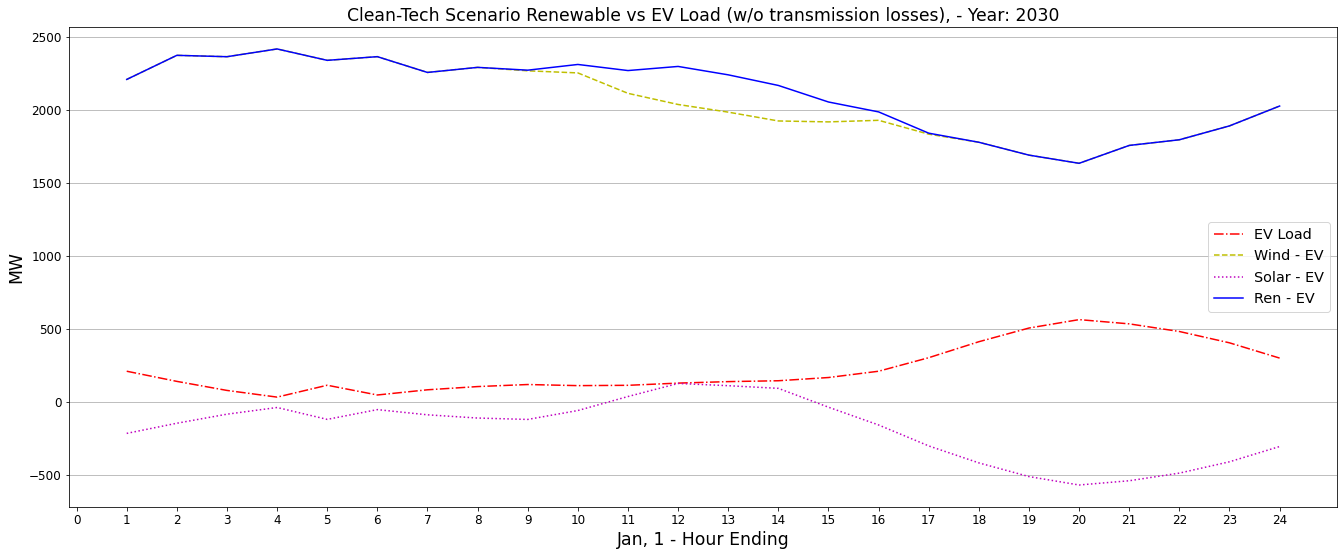

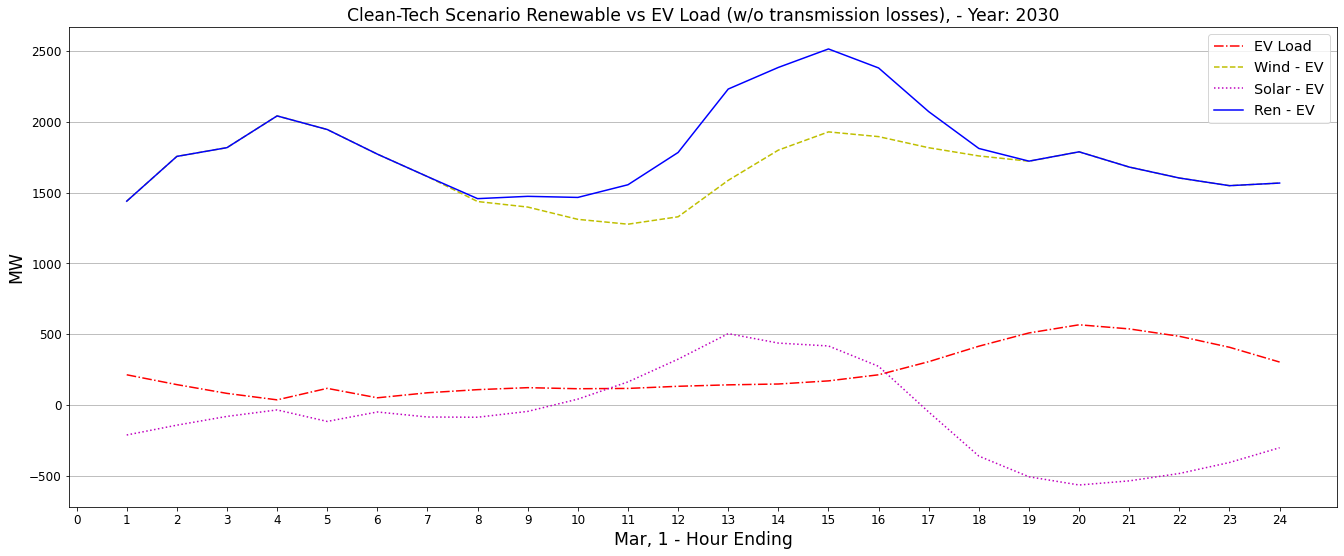

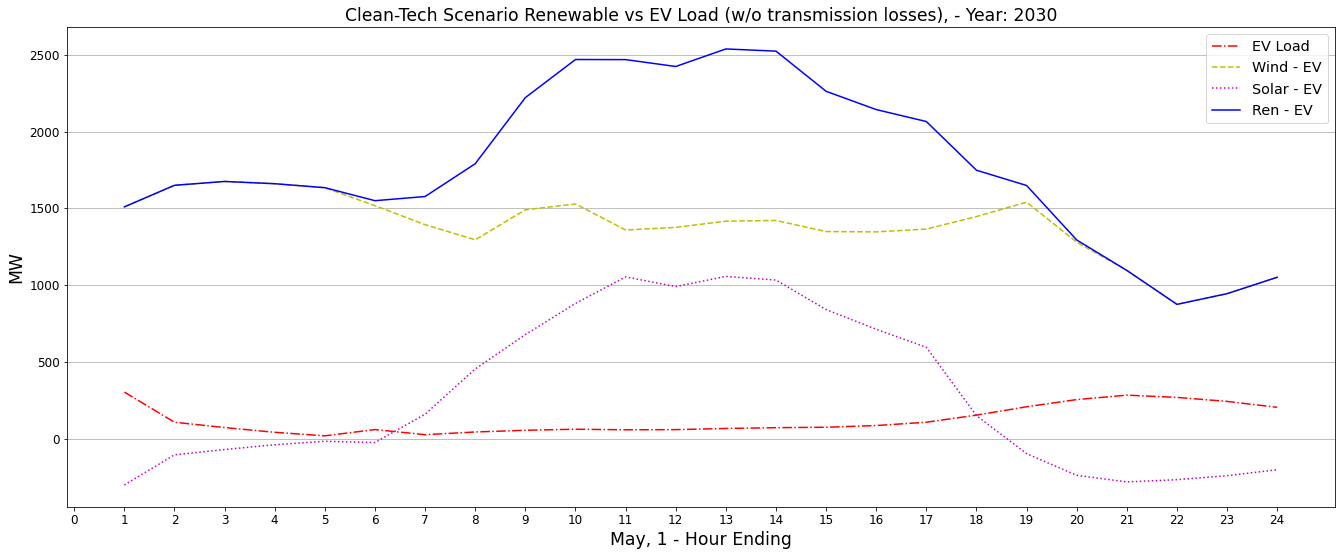

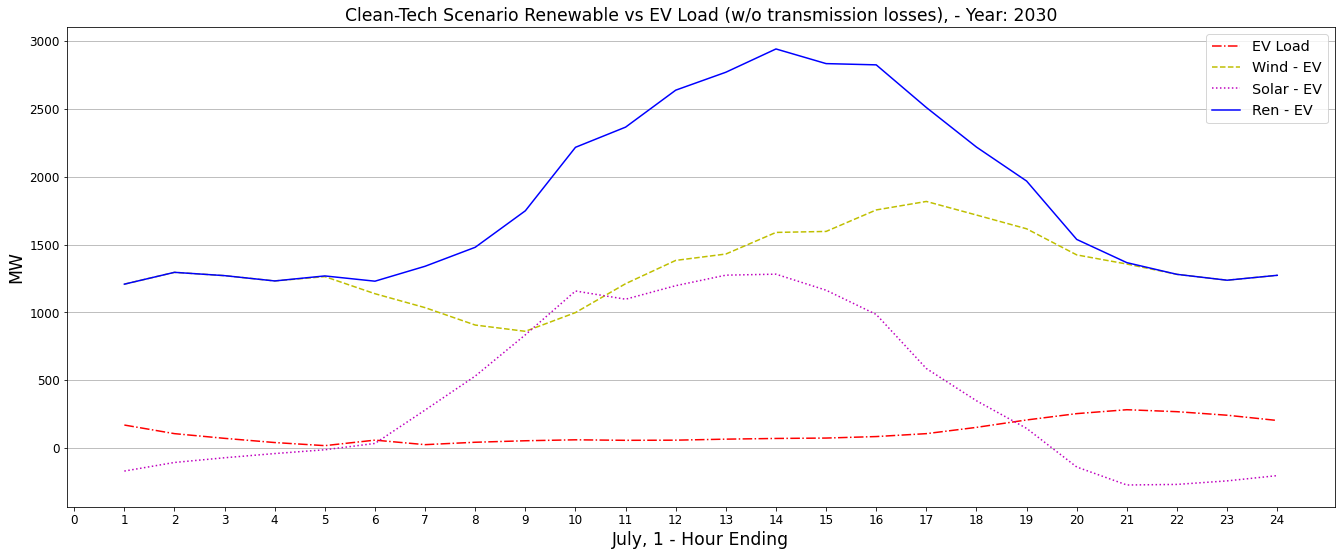

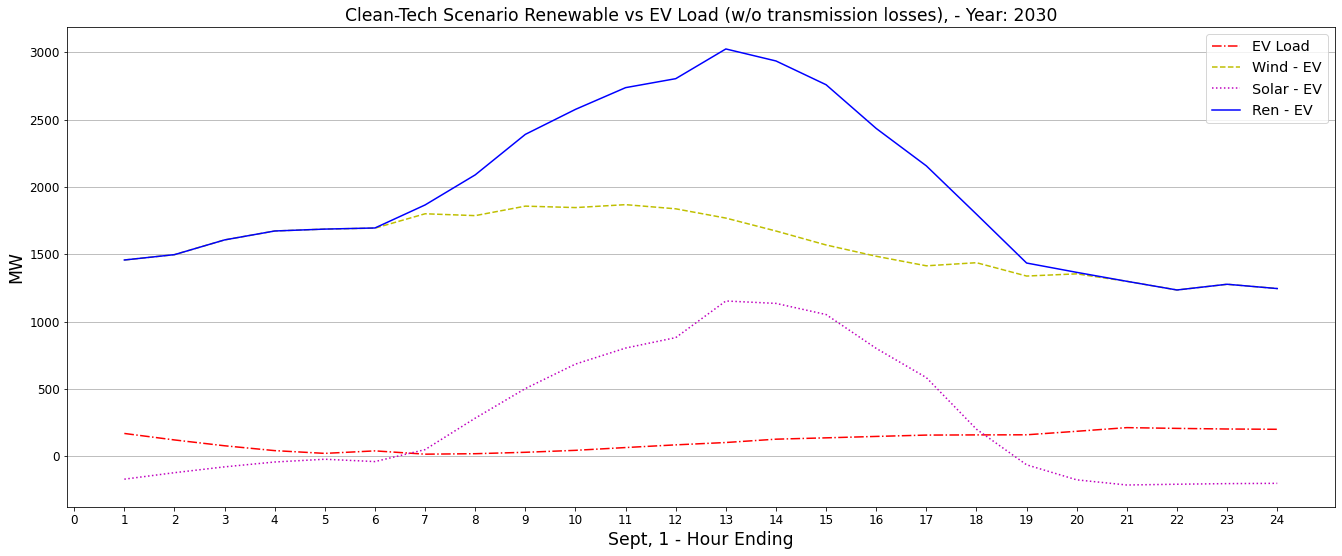

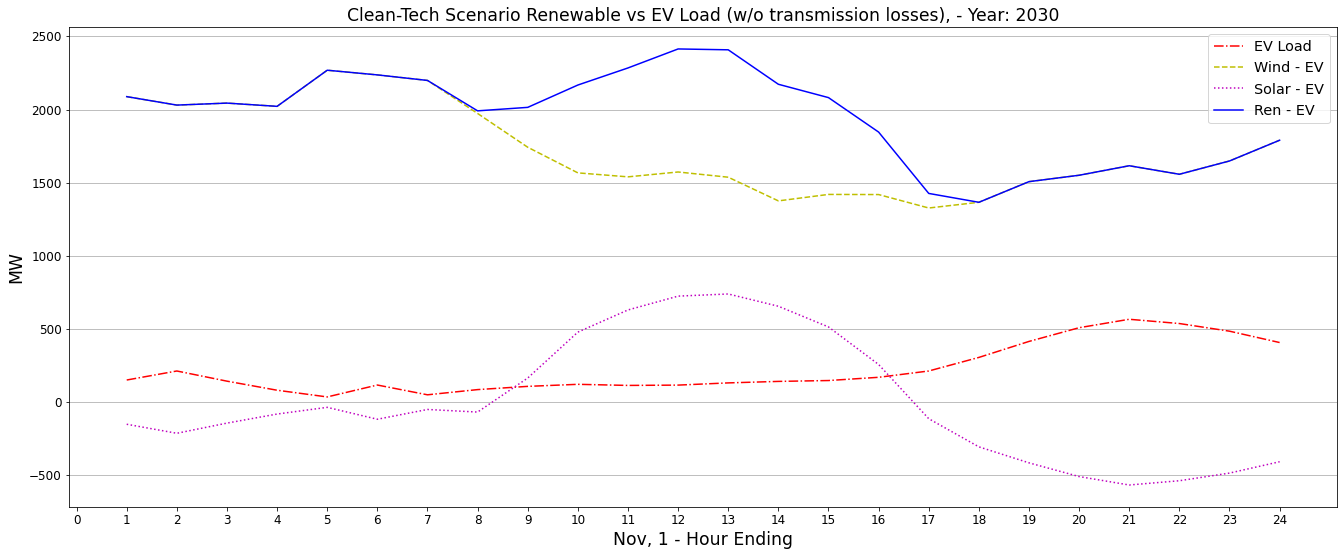

In [81]:
# Clean-Tech Scenario without transmission losses.

# Asks user to input a year, returning subplots showing the first day of every second month's data (starting in Jan)

# year = "2039"
year = int(input("Please enter a year between 2021-2041: "))

# Need to add condition to test if string input.
while True:
    if (year >= 2021 and year <= 2041):
        break

    print("Invalid entry.\n")
    year = int(input("Please enter a year between 2021-2041: "))

m = ["01", "03", "05", "07", "09", "11"]
n = ["Jan, 1", "Mar, 1", "May, 1", "July, 1", "Sept, 1", "Nov, 1"]

# Convert "year" into a string to be used below.
year = str(year)

# Iterates through 6 months of the year plotting the first day of the month's hourly data.
for i in range(len(m)):
    
    first = "%s-%s-01 00:00:00" % (year, m[i])
    first = pd.to_datetime(first)
    
    last = "%s-%s-01 23:00:00" % (year, m[i])
    last = pd.to_datetime(last)

    day_data = evhr[first:last].copy()
#     print(isinstance(day_data, pd.DataFrame))

    day_data["Wind - EV"] = day_data["Wind Generation Output ct"] - day_data["EV Load ct (MWh)"]
    day_data["Solar - EV"] = day_data["Solar Generation Output ct"] - day_data["EV Load ct (MWh)"]
    day_data["Ren - EV"] = day_data["Wind Generation Output ct"]\
                                    + day_data["Solar Generation Output ct"]\
                                    - day_data["EV Load ct (MWh)"]
    day_data["Hour"] = day_data["Hour Ending"] - 1
    
#     print(isinstance(day_data, pd.DataFrame))
#     display(day_data)

    plt.figure(figsize=(50,30))

    plt.subplot(3, 2, i + 1)

    plt.plot(day_data["Hour Ending"], day_data["EV Load ct (MWh)"], "-.r", label="EV Load")
    plt.plot(day_data["Hour Ending"], day_data["Wind - EV"], "--y", label="Wind - EV")
    plt.plot(day_data["Hour Ending"], day_data["Solar - EV"], ":m", label="Solar - EV")
    plt.plot(day_data["Hour Ending"], day_data["Ren - EV"], "-b", label="Ren - EV")
    
    plt.xlabel(n[i] + " - Hour Ending", fontsize="xx-large")
    plt.ylabel("MW", fontsize="xx-large")
    
#     plt.gcf().autofmt_xdate()
    
    # Need to change %s to %d when 'year' variable is requested from user.
    plt.title("Clean-Tech Scenario Renewable vs EV Load (w/o transmission losses), - Year: %s"\
              % year, fontsize="xx-large")

    plt.xticks(np.arange(0, 25, step=1), fontsize="large")
    plt.yticks(fontsize="large")
    
    plt.legend(fontsize="x-large")
    plt.grid(axis = "y")
    
del day_data

### Reference Scenario without transmission losses

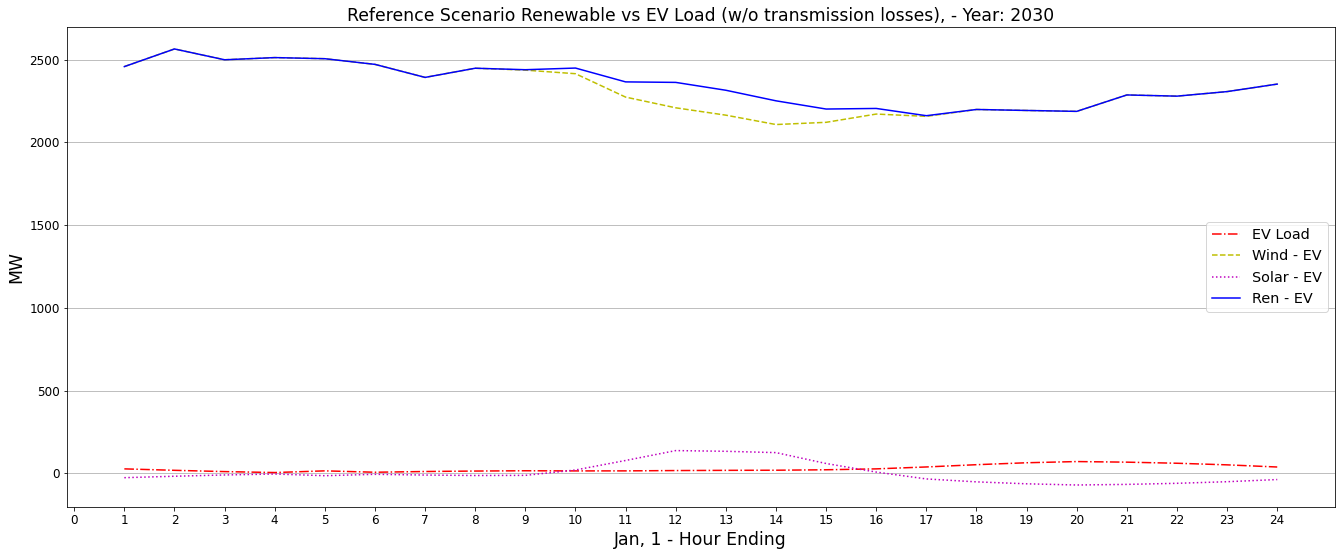

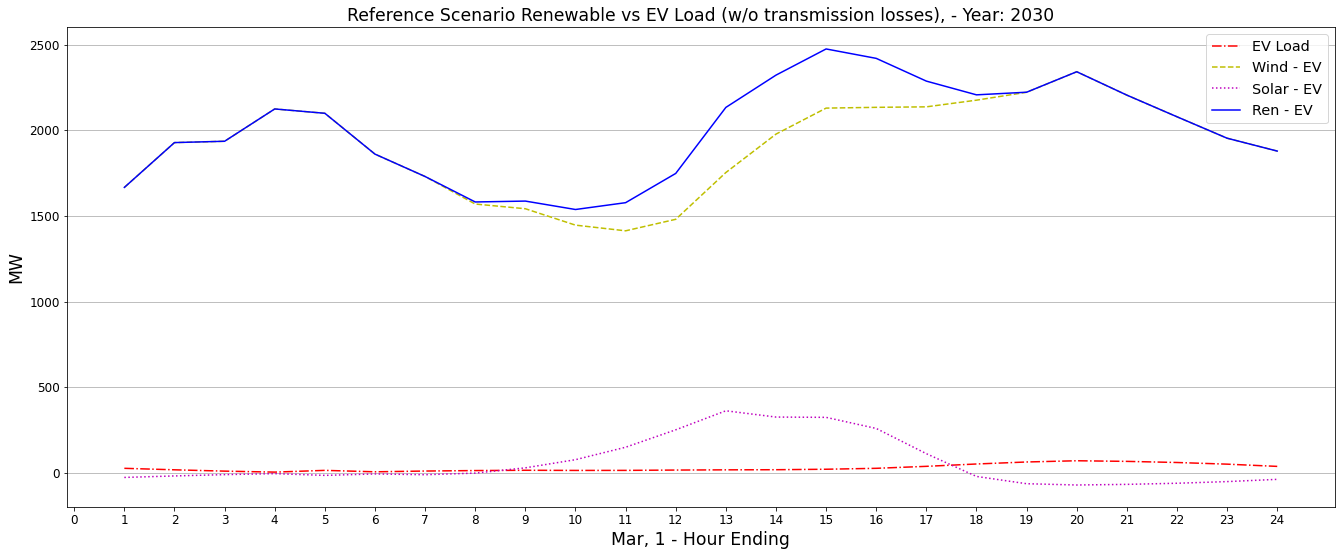

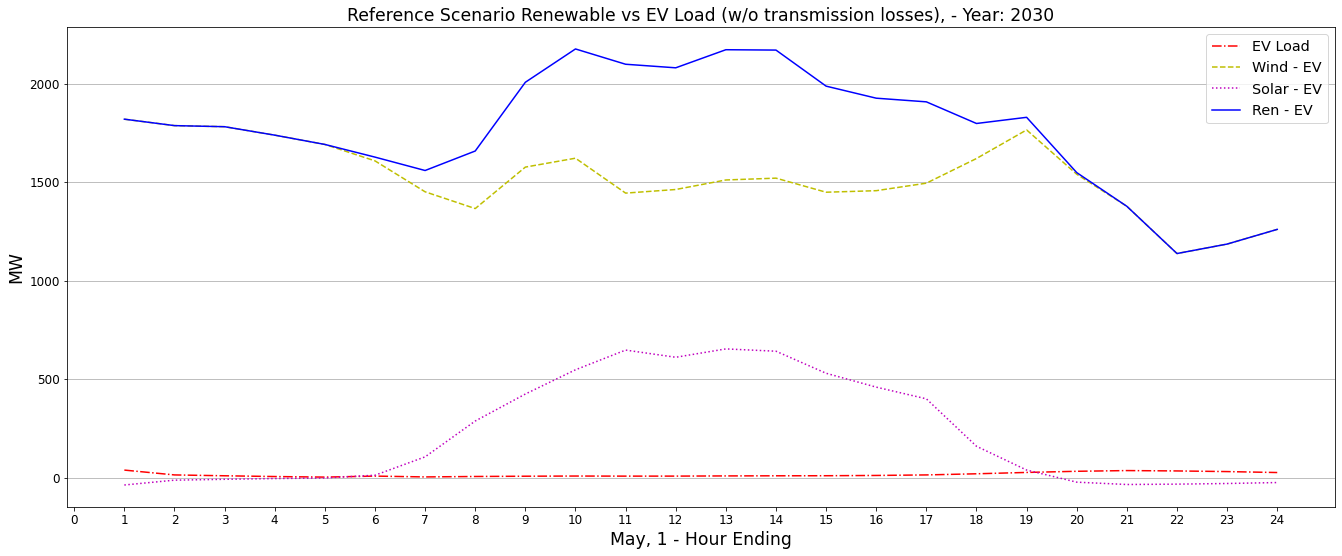

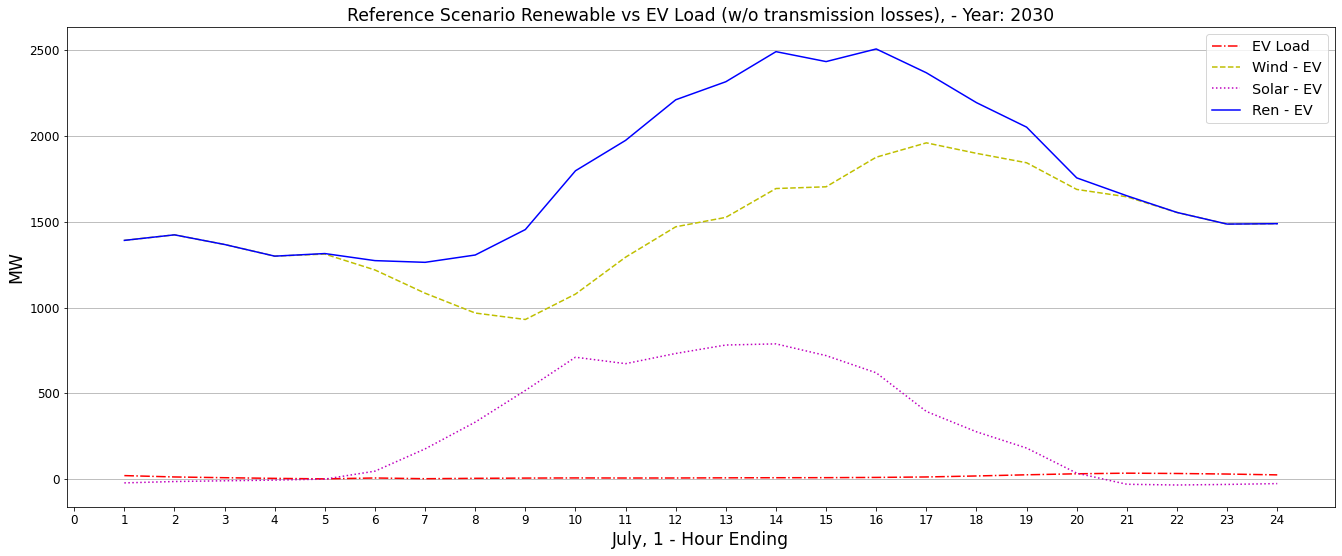

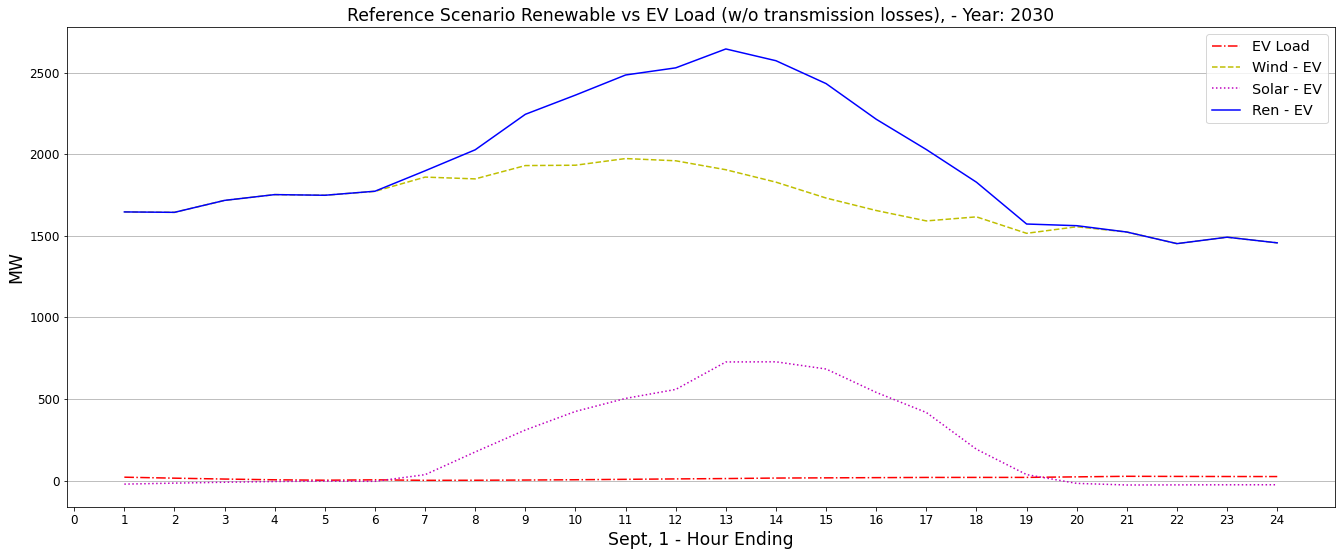

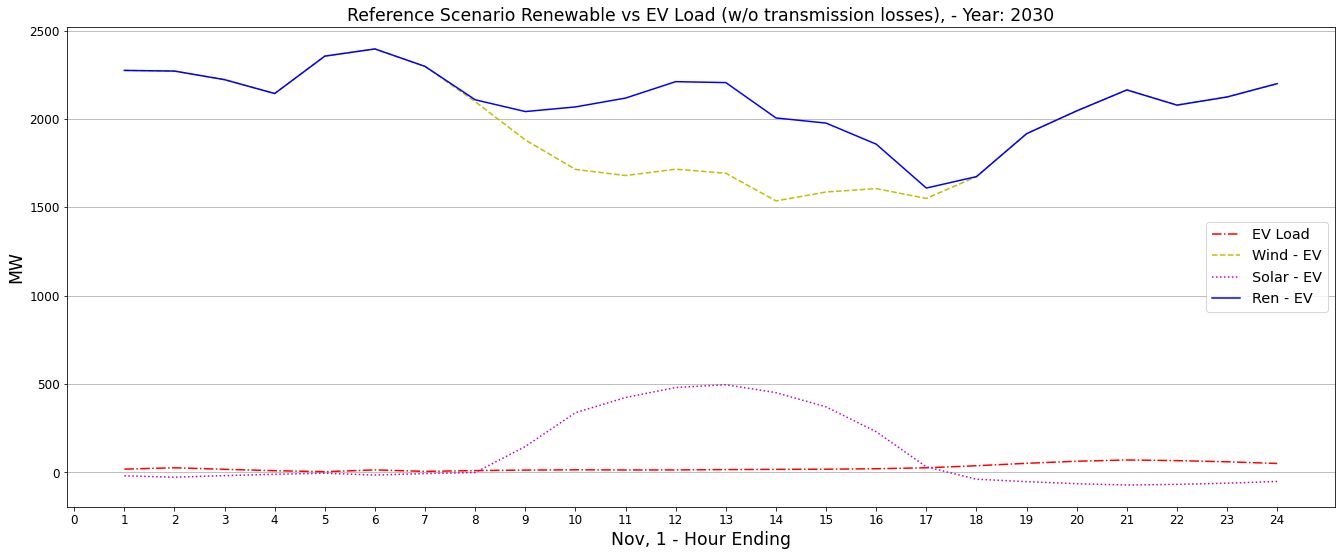

In [82]:
# Reference scenario without transmission losses.

# Iterates through 6 months of the year plotting the first day of the month's hourly data.
for i in range(len(m)):
    
    first = "%s-%s-01 00:00:00" % (year, m[i])
    first = pd.to_datetime(first)
    
    last = "%s-%s-01 23:00:00" % (year, m[i])
    last = pd.to_datetime(last)

    day_data = evhr[first:last].copy()
#     print(isinstance(day_data, pd.DataFrame))

    day_data["Wind - EV"] = day_data["Wind Generation Output ref"] - day_data["EV Load ref (MWh)"]
    day_data["Solar - EV"] = day_data["Solar Generation Output ref"] - day_data["EV Load ref (MWh)"]
    day_data["Ren - EV"] = day_data["Wind Generation Output ref"]\
                                    + day_data["Solar Generation Output ref"]\
                                    - day_data["EV Load ref (MWh)"]
    day_data["Hour"] = day_data["Hour Ending"] - 1
    
#     print(isinstance(day_data, pd.DataFrame))
#     display(day_data)

    plt.figure(figsize=(50,30))

    plt.subplot(3, 2, i + 1)

    plt.plot(day_data["Hour Ending"], day_data["EV Load ref (MWh)"], "-.r", label="EV Load")
    plt.plot(day_data["Hour Ending"], day_data["Wind - EV"], "--y", label="Wind - EV")
    plt.plot(day_data["Hour Ending"], day_data["Solar - EV"], ":m", label="Solar - EV")
    plt.plot(day_data["Hour Ending"], day_data["Ren - EV"], "-b", label="Ren - EV")
    
    plt.xlabel(n[i] + " - Hour Ending", fontsize="xx-large")
    plt.ylabel("MW", fontsize="xx-large")
    
#     plt.gcf().autofmt_xdate()
    
    # Need to change %s to %d when 'year' variable is requested from user.
    plt.title("Reference Scenario Renewable vs EV Load (w/o transmission losses), - Year: %s"\
              % year, fontsize="xx-large")

    plt.xticks(np.arange(0, 25, step=1), fontsize="large")
    plt.yticks(fontsize="large")
    
    plt.legend(fontsize="x-large")
    plt.grid(axis = "y")
    
del day_data

### Clean-Tech Scenario with transmission losses

*Transmission losses assumed at 2.8% to follow with AESO 2021 LTO assumptions*

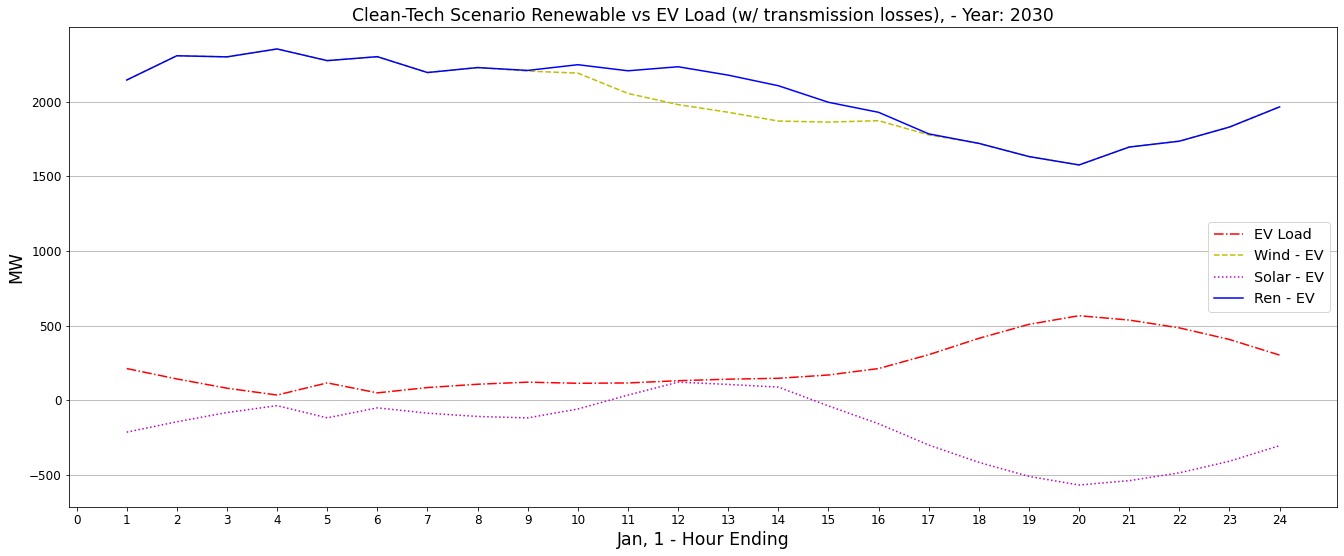

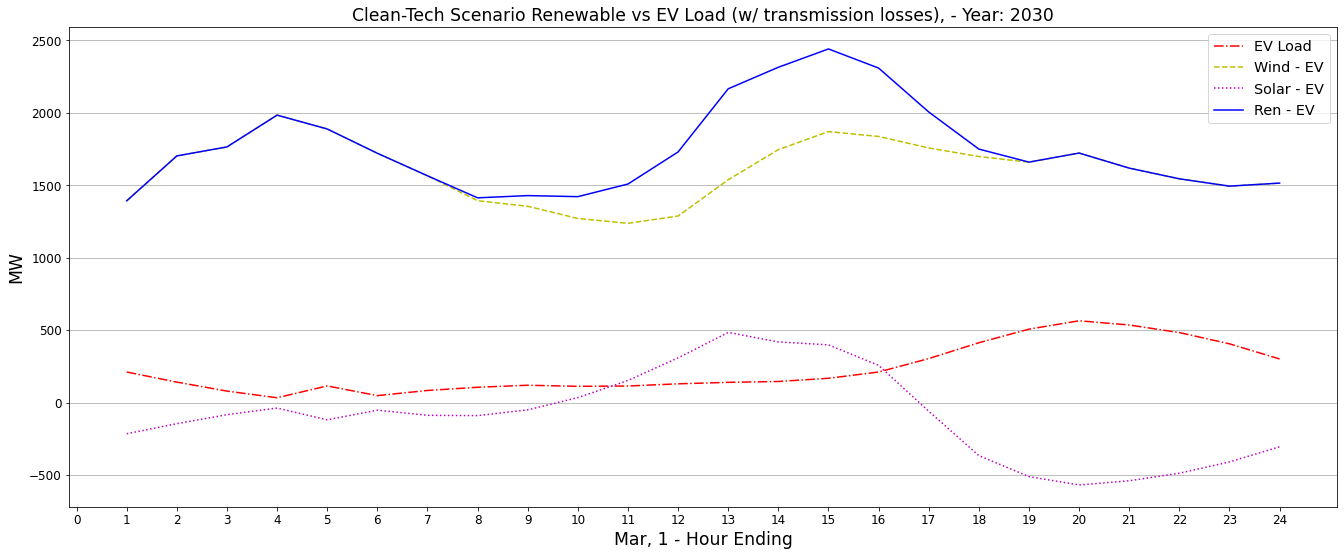

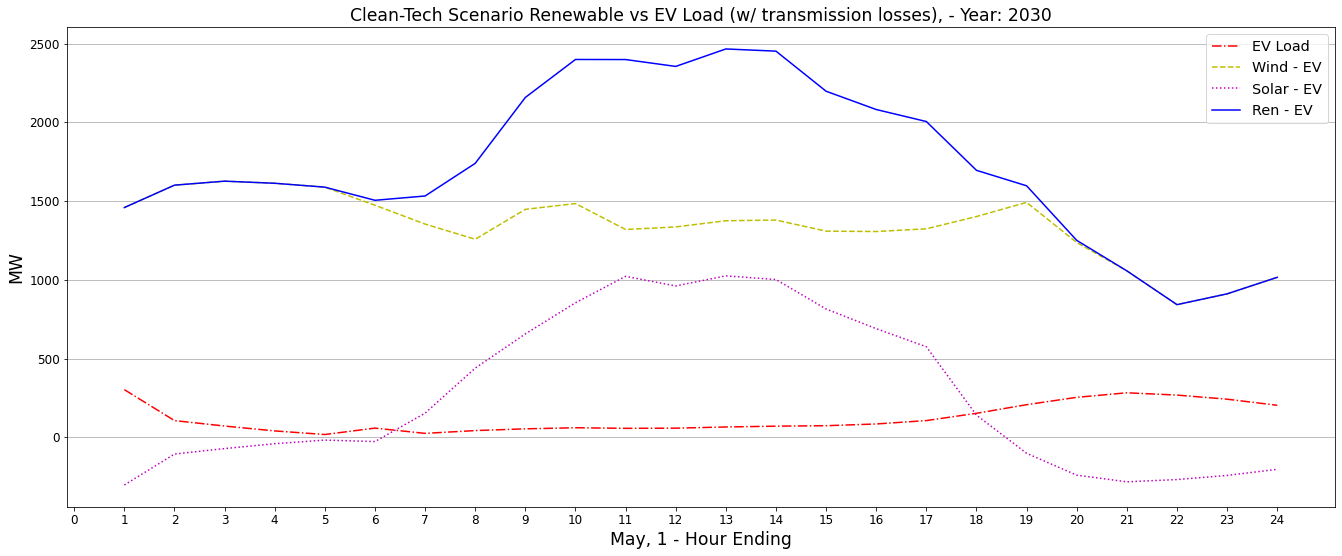

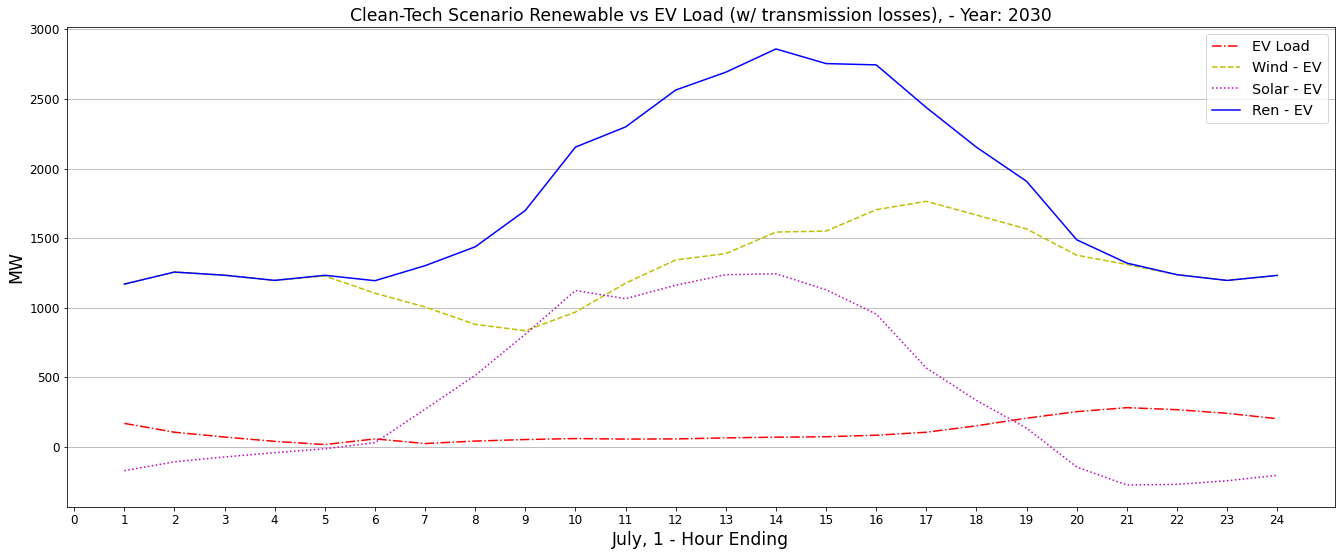

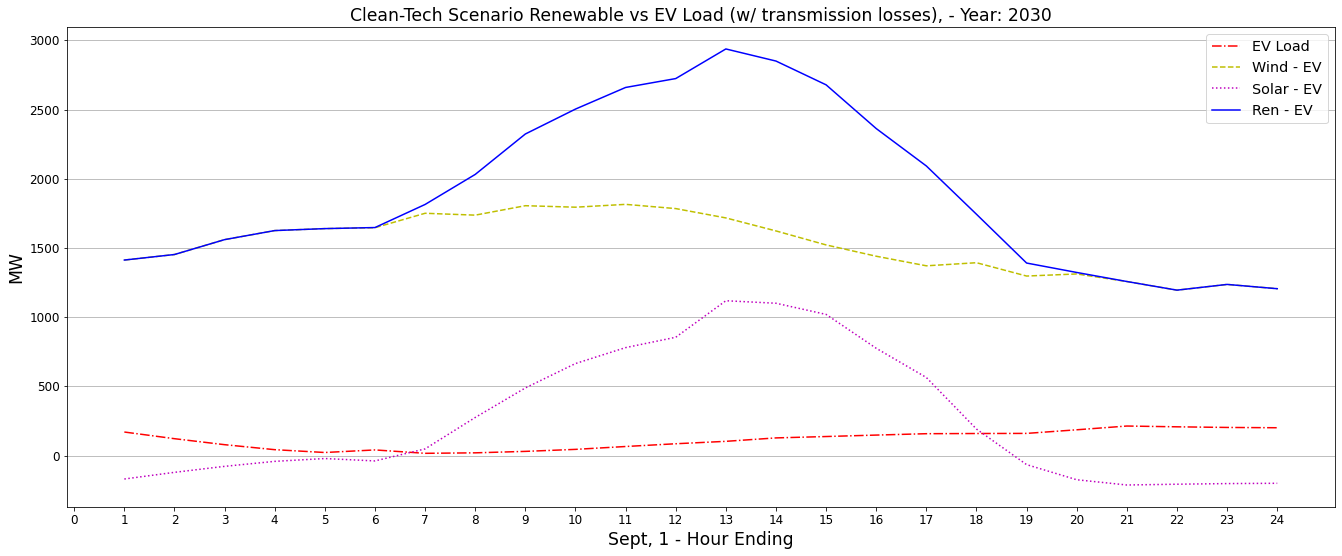

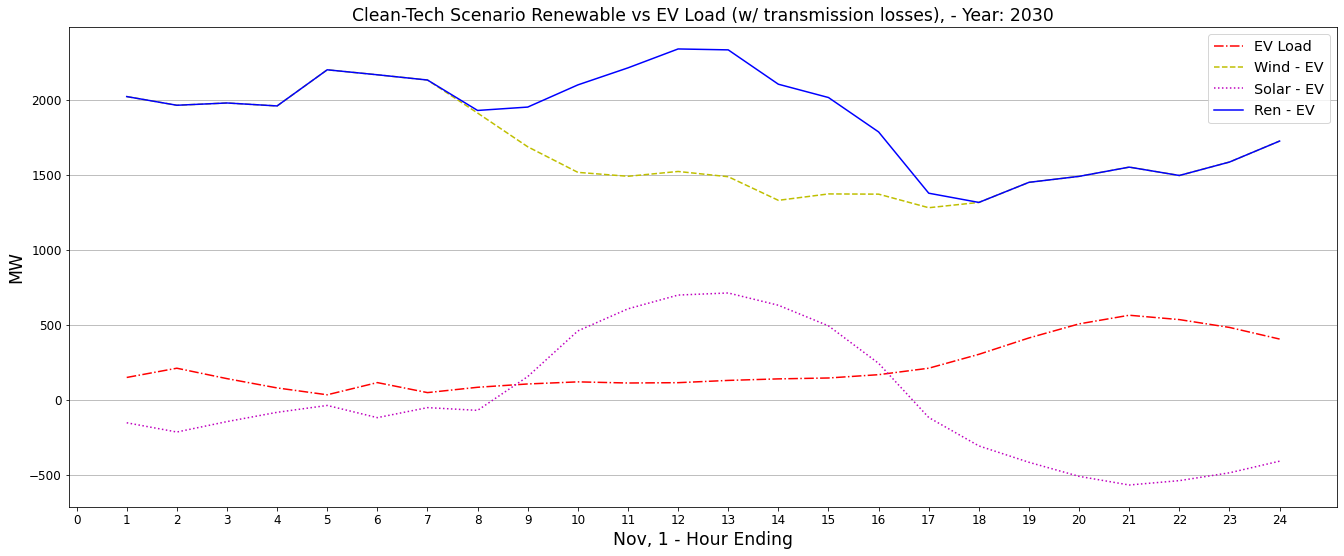

In [83]:
# Clean-Tech scenario with 2.8% transmission losses.

# Iterates through 6 months of the year plotting the first day of the month's hourly data.
for i in range(len(m)):
    
    first = "%s-%s-01 00:00:00" % (year, m[i])
    first = pd.to_datetime(first)
    
    last = "%s-%s-01 23:00:00" % (year, m[i])
    last = pd.to_datetime(last)

    day_data = evhr[first:last].copy()
#     print(isinstance(day_data, pd.DataFrame))

    day_data["Wind - EV"] = day_data["Wind Generation Output ct"]\
                                    * 0.972\
                                    - day_data["EV Load ct (MWh)"]
    day_data["Solar - EV"] = day_data["Solar Generation Output ct"]\
                                    * 0.972\
                                    - day_data["EV Load ct (MWh)"]
    day_data["Ren - EV"] = day_data["Wind Generation Output ct"]\
                                    * 0.972\
                                    + day_data["Solar Generation Output ct"]\
                                    * 0.972\
                                    - day_data["EV Load ct (MWh)"]
    day_data["Hour"] = day_data["Hour Ending"] - 1
    
#     print(isinstance(day_data, pd.DataFrame))
#     display(day_data)

    plt.figure(figsize=(50,30))

    plt.subplot(3, 2, i + 1)

    plt.plot(day_data["Hour Ending"], day_data["EV Load ct (MWh)"], "-.r", label="EV Load")
    plt.plot(day_data["Hour Ending"], day_data["Wind - EV"], "--y", label="Wind - EV")
    plt.plot(day_data["Hour Ending"], day_data["Solar - EV"], ":m", label="Solar - EV")
    plt.plot(day_data["Hour Ending"], day_data["Ren - EV"], "-b", label="Ren - EV")
    
    plt.xlabel(n[i] + " - Hour Ending", fontsize="xx-large")
    plt.ylabel("MW", fontsize="xx-large")
    
#     plt.gcf().autofmt_xdate()
    
    # Need to change %s to %d when 'year' variable is requested from user.
    plt.title("Clean-Tech Scenario Renewable vs EV Load (w/ transmission losses), - Year: %s"\
              % year, fontsize="xx-large")

    plt.xticks(np.arange(0, 25, step=1), fontsize="large")
    plt.yticks(fontsize="large")
    
    plt.legend(fontsize="x-large")
    plt.grid(axis = "y")
    
del day_data

### Reference Scenario with transmission losses

*Transmission losses assumed at 2.8% to follow with AESO 2021 LTO assumptions*

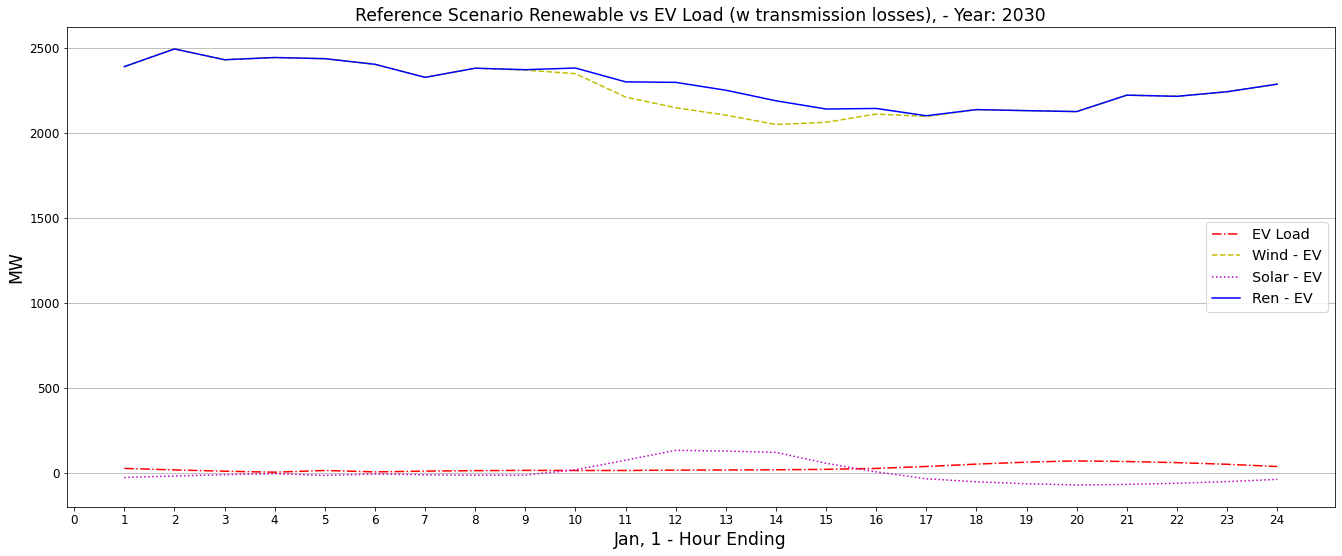

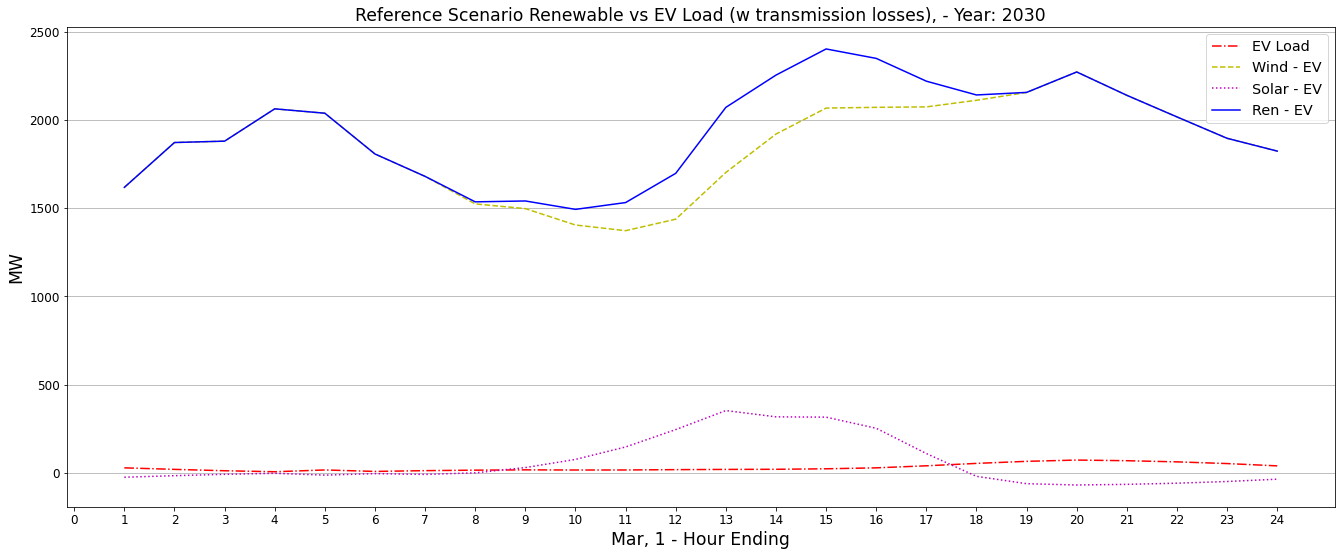

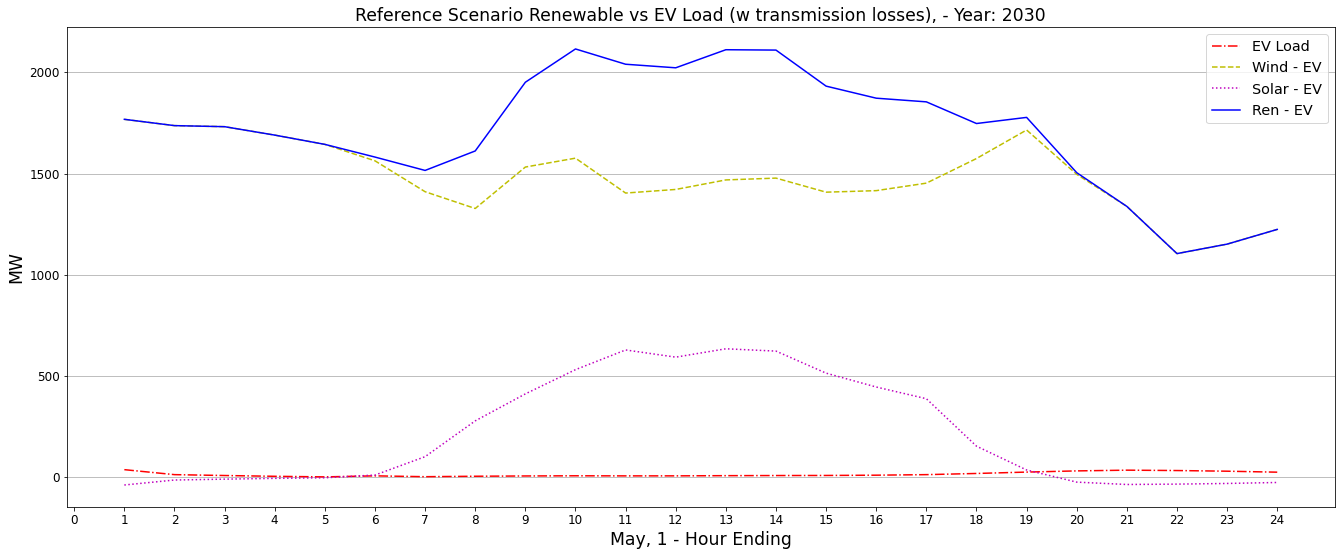

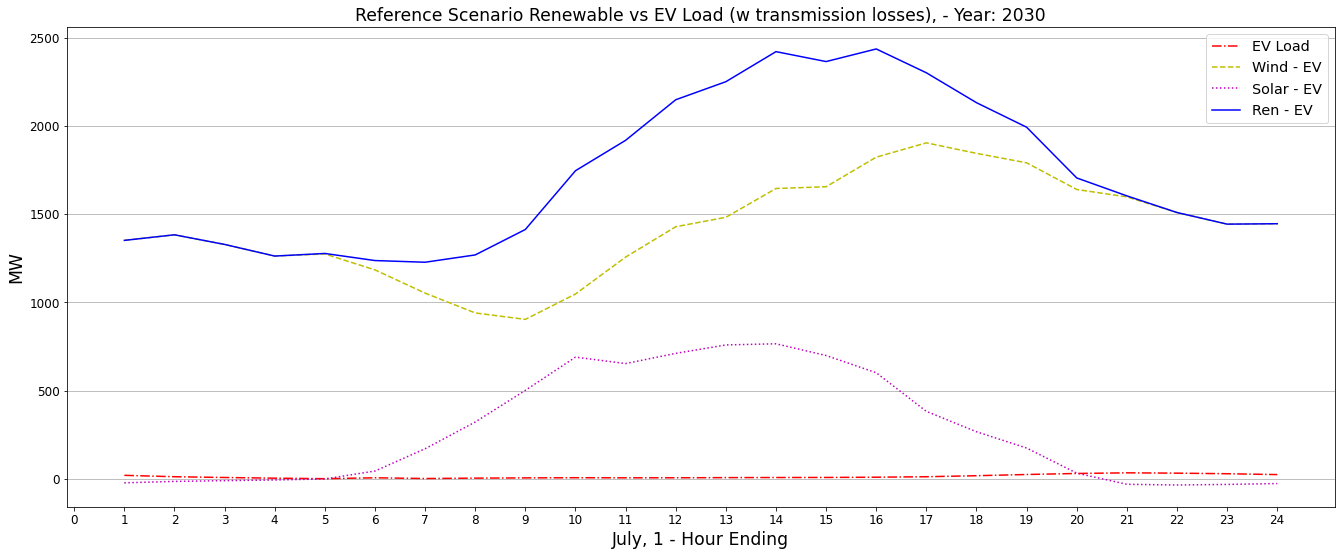

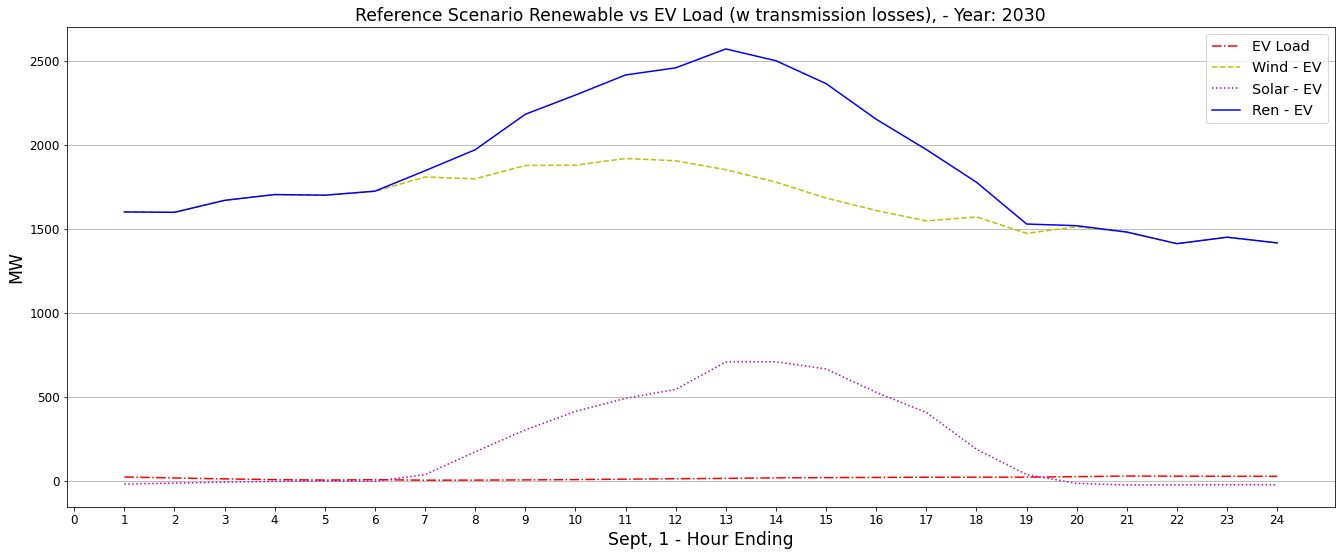

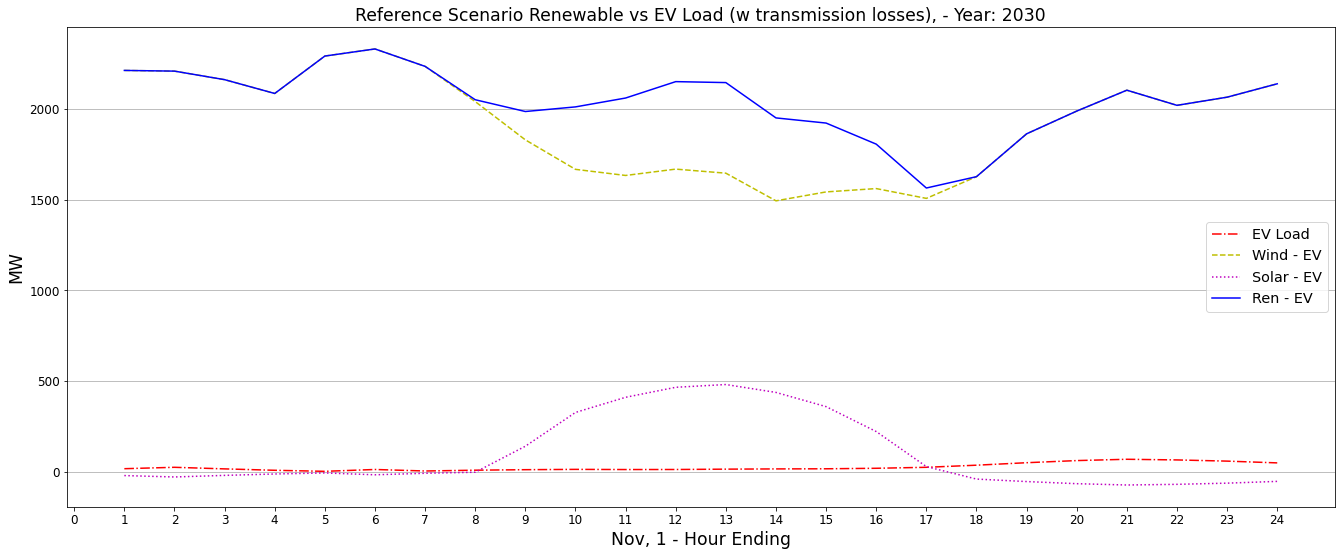

In [84]:
# Reference scenario with 2.8% transmission losses.

# Iterates through 6 months of the year plotting the first day of the month's hourly data.
for i in range(len(m)):
    
    first = "%s-%s-01 00:00:00" % (year, m[i])
    first = pd.to_datetime(first)
    
    last = "%s-%s-01 23:00:00" % (year, m[i])
    last = pd.to_datetime(last)

    day_data = evhr[first:last].copy()
#     print(isinstance(day_data, pd.DataFrame))

    day_data["Wind - EV"] = day_data["Wind Generation Output ref"]\
                                    * 0.972\
                                    - day_data["EV Load ref (MWh)"]
    day_data["Solar - EV"] = day_data["Solar Generation Output ref"]\
                                    * 0.972\
                                    - day_data["EV Load ref (MWh)"]
    day_data["Ren - EV"] = day_data["Wind Generation Output ref"]\
                                    * 0.972\
                                    + day_data["Solar Generation Output ref"]\
                                    * 0.972\
                                    - day_data["EV Load ref (MWh)"]
    day_data["Hour"] = day_data["Hour Ending"] - 1
    
#     print(isinstance(day_data, pd.DataFrame))
#     display(day_data)

    plt.figure(figsize=(50,30))

    plt.subplot(3, 2, i + 1)

    plt.plot(day_data["Hour Ending"], day_data["EV Load ref (MWh)"], "-.r", label="EV Load")
    plt.plot(day_data["Hour Ending"], day_data["Wind - EV"], "--y", label="Wind - EV")
    plt.plot(day_data["Hour Ending"], day_data["Solar - EV"], ":m", label="Solar - EV")
    plt.plot(day_data["Hour Ending"], day_data["Ren - EV"], "-b", label="Ren - EV")
    
    plt.xlabel(n[i] + " - Hour Ending", fontsize="xx-large")
    plt.ylabel("MW", fontsize="xx-large")
    
#     plt.gcf().autofmt_xdate()
    
    # Need to change %s to %d when 'year' variable is requested from user.
    plt.title("Reference Scenario Renewable vs EV Load (w transmission losses), - Year: %s"\
              % year, fontsize="xx-large")

    plt.xticks(np.arange(0, 25, step=1), fontsize="large")
    plt.yticks(fontsize="large")
    
    plt.legend(fontsize="x-large")
    plt.grid(axis = "y")
    
del day_data

In [85]:
# Delete vaiables from cells above
del year
del m
del n

# Bokeh: Visualizing our Extrapolated Data using the Bokeh Library

**Here we will attempt to use the bokeh python library to represent our data**

Notes:

- In order to run real-time widgets in the notebook the "ipywidgets" library is required, with specified calls.
- Running Bokeh widgets requires a Bokeh server, therefore Bokeh widgets cannot currently be done from within Jupyter Notebook.
- Coding for Bokeh widgets and ipywidgets are different.

In [86]:
# display(evhr)

In [87]:
# Create the ColumnDataSource from our DataFrame.
source = ColumnDataSource(evhr)

In [88]:
source.column_names

['Date',
 'year',
 'month',
 'day',
 'Calendar Date',
 'Hour Ending',
 'AIL (MWh)*',
 'AIL_Raw (MWh)*',
 ' Less than 5 MW DER_gas (MWh)*',
 'Less than 5 MW DER_PV (MWh)*',
 'Less than 5 MW DER_Wind (MWh)*',
 'EV Load ref (MWh)',
 'Number of Electric Vehicles ref',
 'Number of Electric Vehicles ct',
 'EV ratio multiplier',
 'EV Load ct (MWh)',
 'Solar Capacity Begin Year (MW) ref',
 'Wind Capacity Begin Year (MW) ref',
 'Solar Capacity Begin Year (MW) ct',
 'Wind Capacity Begin Year (MW) ct',
 'Solar Avg. Capacity Factor',
 'Solar Avg. Capacity Factor std',
 'Solar Capacity Factor min',
 'Solar Capacity Factor max',
 'Solar Capacity Factor 2020',
 'Wind Avg. Capacity Factor',
 'Wind Avg. Capacity Factor std',
 'Wind Capacity Factor min',
 'Wind Capacity Factor max',
 'Wind Capacity Factor 2020',
 'Solar Generation Output ref',
 'Solar Generation Output ref min',
 'Solar Generation Output ref max',
 'Solar Generation Output ref 2020 cf',
 'Solar Generation Output ct',
 'Solar Generation 

## EV Load Shifting function
**Function used with dropdown menus to give bokeh plot**

In [130]:
def update_year(Year=2031, Month=1):
    # Create the ColumnDataSource from our DataFrame.
    # Create the source global to be used outside the function.
    global source
    source = ColumnDataSource(evhr.loc[(evhr["year"] == int(Year)) & (evhr.month == Month)])
    
    # Create globals year and month.
    # Globals are needed outside the function later.
    global year, month
    year = Year
    month = Month
    
    # Format the figure specifics.
#     global p
    p = figure(
        height=550, width=500,
        x_axis_type="datetime",
        y_range = (-500, 5000),
        title="Renewable Generation - EV Load Forecast,\nwith 2.8% transmission losses",
        toolbar_location="right",
        x_range=(source.data["Date"][0], source.data["Date"][24])
    )


    # Create ColumnDataSource columns with applicable data, include transmission losses of 2.8%.
    source.data["Wind - EV Load ct"] = source.data["Wind Generation Output ct"]\
                                                    * 0.972\
                                                    - source.data["EV Load ct (MWh)"]
    source.data["Solar - EV Load ct"] = source.data["Solar Generation Output ct"]\
                                                    * 0.972\
                                                    - source.data["EV Load ct (MWh)"]
    source.data["Ren - EV Load ct"] = source.data["Solar Generation Output ct"]\
                                                    * 0.972\
                                                    + source.data["Wind Generation Output ct"]\
                                                    * 0.972\
                                                    - source.data["EV Load ct (MWh)"]
    source.data["Ren - EV Load ct min"] = source.data["Solar Generation Output ct min"]\
                                                    * 0.972\
                                                    + source.data["Wind Generation Output ct min"]\
                                                    * 0.972\
                                                    - source.data["EV Load ct (MWh)"]
    source.data["Ren - EV Load ct max"] = source.data["Solar Generation Output ct max"]\
                                                    * 0.972\
                                                    + source.data["Wind Generation Output ct max"]\
                                                    * 0.972\
                                                    - source.data["EV Load ct (MWh)"]
    source.data["Ren - EV Load ct using 2020 cf"] = source.data["Solar Generation Output ct 2020 cf"]\
                                                    * 0.972\
                                                    + source.data["Wind Generation Output ct 2020 cf"]\
                                                    * 0.972\
                                                    - source.data["EV Load ct (MWh)"]

    # Format the data to be plotted.
#     p.line(x="Date", y="Wind - EV Load ct", color="blue", source=source, legend_label="Wind - EV Load ct")
#     p.line(x="Date", y="Solar - EV Load ct", color="orange", source=source, legend_label="Solar - EV Load ct")
    p.line(x="Date", y="Ren - EV Load ct", color="green", source=source, legend_label="Ren - EV Load CT")
    p.line(x="Date", y="EV Load ct (MWh)", color="red", source=source, legend_label="EV Load CT (MWh)")
#     p.line(x="Date", y="Ren - EV Load ct max", color="lightgrey", source=source, legend_label="Ren - EV Load ct max")
#     p.line(x="Date", y="Ren - EV Load ct min", color="lightsteelblue", source=source, legend_label="Ren - EV Load ct min")
    p.line(x="Date", y="Ren - EV Load ct using 2020 cf",\
           color="peru",\
           source=source,\
           legend_label="Ren - EV Load CT using 2020 CF")

# Trying to use whisker tool.
    p.add_layout(
        Whisker(source=source,\
                base="Date",\
                upper="Ren - EV Load ct max",\
                lower="Ren - EV Load ct min",\
                line_width=0.5,
                dimension="height",
                line_alpha=0.5
                )
    )

    # HoverTool formatting.
#     global hover
    hover = HoverTool(tooltips="@Date")
    hover = HoverTool(tooltips=[
            ("Date","$x{%F}"),
            ("Time","@Time")
            ],
          formatters={'$x':'datetime'}, # use 'datetime' formatter for 'date' field
        )

    p.add_tools(hover)

    # Format axis specifics.
    p.xgrid.grid_line_alpha=1
    p.ygrid.grid_line_alpha=1
    p.xaxis.axis_label = "Date Time"
    p.yaxis.axis_label = "Power Difference (MW)"

    # Format legend.
    p.legend.location = "bottom_left"
#     p.legend.location = "top_left"
#     p.legend.location = (0, 125)
    p.below.append(p.legend[0])
    p.legend.click_policy = "hide"
    p.legend.title = "Scenario"

    # Format figure for the range tool.
#     global select
    select = figure(title="Drag the middle and edges of the selection box to change the range above",
                    height=130, width=900, y_range=p.y_range,
                    x_axis_type="datetime", y_axis_type=None,
                    tools="", toolbar_location=None, background_fill_color="#efefef")

    # Range tool formatting.
#     global range_tool
    range_tool = RangeTool(x_range=p.x_range)
#     range_tool = RangeTool()
    range_tool.overlay.fill_color = "navy"
    range_tool.overlay.fill_alpha = 0.2

    # Range tool data to be shown.
#     select.line('Date',"Wind - EV Load ct", color="blue", source=source)
#     select.line('Date',"Solar - EV Load ct", color="orange", source=source)
    select.line('Date',"Ren - EV Load ct", color="green", source=source)
#     select.line('Date',"Ren - EV Load ct max", color="grey", source=source)
#     select.line('Date',"Ren - EV Load ct min", color="grey", source=source)
    select.line('Date',"EV Load ct (MWh)", color="red", source=source)
    select.ygrid.grid_line_color = None
    select.add_tools(range_tool)
    select.toolbar.active_multi = range_tool
    
    # Use to export plot image.
    # Bokeh plots allow save option, this may not be necessary depending on result required.
    # Bokeh save options beside fig save to downloads with generic filename.
#     export_png(p, filename="sept2030.png")
    
    # Create the global show handle so we can used push_notebook() later.
    global handle
    handle = show(column(p, select), notebook_handle=True)
    return 


## Additional Renewable Generation Function

**Will only perform operations for the Clean-Tech case, since this is the focus for the bokeh graphs**

Generation will be added on a compounded percentage basis, starting in year 2021.

In [131]:
# Function to add additional renewable generation capacity 
def add_gen(percent_wind_add=0, percent_solar_add=0):

    # Make percents decimal.
    percent_wind_add = percent_wind_add / 100
    percent_solar_add = percent_solar_add / 100
    
    # Make a copy of yearly generation capacities.
    gen_yearly = ev_gen_yearly.copy()

    # Drop all columns except year and renewable generation
    gen_yearly = gen_yearly.drop(labels=
                                 ["Number of Electric Vehicles ref",
                                 "Number of Electric Vehicles ct",
                                 "EV ratio multiplier",
                                 "Solar Capacity Begin Year (MW) ref",
                                 "Wind Capacity Begin Year (MW) ref"],
                                axis=1,
                                inplace=False)

    # Initialize variables to be used in loop
    sol = 0
    win = 0

    # Loop to calculate compounded additional generation.
    for i in range(0, len(gen_yearly)):
        
        # Compound additional generation capacity across years.
        # The below commented out code works for positive percentages but not
        # for negative percentages.  The active code below is an effective work around.
#         sol = (sol + gen_yearly.loc[i, "Solar Capacity Begin Year (MW) ct"])\
#                 * percent_solar_add
#         win = (win + gen_yearly.loc[i, "Wind Capacity Begin Year (MW) ct"])\
#                 * percent_wind_add
        
        # Compound additional generation capacity across years.
        # Code work for both positive and negative percentages.
        if percent_solar_add >= 0:
            sol = (sol + gen_yearly.loc[i, "Solar Capacity Begin Year (MW) ct"])\
                    * percent_solar_add
        else:
            sol = (-sol + gen_yearly.loc[i, "Solar Capacity Begin Year (MW) ct"])\
                    * percent_solar_add
            
        if percent_wind_add >= 0:
            win = (win + gen_yearly.loc[i, "Wind Capacity Begin Year (MW) ct"])\
                    * percent_wind_add
        else:
            win = (-win + gen_yearly.loc[i, "Wind Capacity Begin Year (MW) ct"])\
                    * percent_wind_add
        
        # Update the applicable dataframe columns as we loop.
        gen_yearly.loc[i, "additional solar capacity ct"] = sol
        gen_yearly.loc[i, "additional wind capacity ct"] = win

#     display(gen_yearly)
        
    # Drop the excess columns after using them in the loop for effective join outside function.
    gen_yearly = gen_yearly.drop(labels=
                             ["Solar Capacity Begin Year (MW) ct",
                             "Wind Capacity Begin Year (MW) ct"],
                            axis=1,
                            inplace=False)

#     display(gen_yearly)
    return gen_yearly

## Renewable Generation to-be-used-elsewhere Function

**Function removes Wind & Solar Generation from grid availability for EV charging**

**Idea is to simulate the fact that not all Wind & Solar Generation dispatched to the grid will be used for EV charging**

In [132]:
# Function to make various load adjustments from slider inputs.
def load_adj(percent=0, percent_wind=0, percent_solar=0, percent_wind_add=0, percent_solar_add=0):

    # Make percent a fraction.
    percent = percent / 100
    percent_wind = percent_wind / 100
    percent_solar = percent_solar / 100  
    
    # Call the add_gen function to create compounded additional generation on percent basis.
    # Return gives separate columns for added wind and solar generation.
    gen_yearly = add_gen(percent_wind_add, percent_solar_add)
    
    # Create a panda dataframe of our selected year and month.
    temp = evhr.loc[(evhr["year"] == year) & (evhr.month == month)].copy()

    # Join gen_yearly columns on temp dataframe 
    temp = temp.join(gen_yearly.set_index("year"), on="year")
#     display(temp)`
    
    # create a dataframe of the index to be used below.
    df_ind = list(temp.index)
    
    # Make Wind Generation available for EV charging adjustment as a percentage removed from the total
    # wind generation across the hour.  Assumed that this percentage removed is used elsewhere in the grid.
    temp["Wind Generation Output ct"] = temp["Wind Generation Output ct"]\
                                            - temp["Wind Generation Output ct"]\
                                            * percent_wind\
                                            + temp["additional wind capacity ct"]\
                                            * temp["Wind Avg. Capacity Factor"]\
                                            * (1 - percent_wind)

    temp["Wind Generation Output ct min"] = temp["Wind Generation Output ct min"]\
                                            - temp["Wind Generation Output ct min"]\
                                            * percent_wind\
                                            + temp["additional wind capacity ct"]\
                                            * temp["Wind Capacity Factor min"]\
                                            * (1 - percent_wind)
    
    temp["Wind Generation Output ct max"] = temp["Wind Generation Output ct max"]\
                                            - temp["Wind Generation Output ct max"]\
                                            * percent_wind\
                                            + temp["additional wind capacity ct"]\
                                            * temp["Wind Capacity Factor max"]\
                                            * (1 - percent_wind)
    temp["Wind Generation Output ct 2020 cf"] = temp["Wind Generation Output ct 2020 cf"]\
                                            - temp["Wind Generation Output ct 2020 cf"]\
                                            * percent_wind\
                                            + temp["additional wind capacity ct"]\
                                            * temp["Wind Capacity Factor 2020"]\
                                            * (1 - percent_wind)
    
    # Make Solar Generation available for EV charging adjustment as a percentage removed from the total
    # solar generation across the hour.  Assumed that this percentage removed is used elsewhere in the grid.
    temp["Solar Generation Output ct"] = temp["Solar Generation Output ct"]\
                                        - temp["Solar Generation Output ct"]\
                                        * percent_solar\
                                        + temp["additional solar capacity ct"]\
                                        * temp["Solar Avg. Capacity Factor"]\
                                        * (1 - percent_solar)
    
    temp["Solar Generation Output ct min"] = temp["Solar Generation Output ct min"]\
                                        - temp["Solar Generation Output ct min"]\
                                        * percent_solar\
                                        + temp["additional solar capacity ct"]\
                                        * temp["Solar Capacity Factor min"]\
                                        * (1 - percent_solar)
    
    temp["Solar Generation Output ct max"] = temp["Solar Generation Output ct max"]\
                                        - temp["Solar Generation Output ct max"]\
                                        * percent_solar\
                                        + temp["additional solar capacity ct"]\
                                        * temp["Solar Capacity Factor max"]\
                                        * (1 - percent_solar)
    temp["Solar Generation Output ct 2020 cf"] = temp["Solar Generation Output ct 2020 cf"]\
                                        - temp["Solar Generation Output ct 2020 cf"]\
                                        * percent_wind\
                                        + temp["additional solar capacity ct"]\
                                        * temp["Solar Capacity Factor 2020"]\
                                        * (1 - percent_wind)
       
    # Make the load adjustment by moving a percentage of predicted EV load back 8 hours.
    # Make the load adjustment from the hours of 3pm to midnight.  Or if considered as "Hour Ending"
    # adjustment range is from hour ending 4pm - 1am the next day.
    # This is done after the generation adjustments for renewable generation used elsewhere.
    for i in range(0, len(temp)):
        time = list(range(16, 25))
        time.append(1)
        if (temp["Hour Ending"].iloc[i] in time) and i > 9:         
            temp.loc[df_ind[i - 9], "EV Load ct (MWh)"] = temp.loc[df_ind[i - 9], "EV Load ct (MWh)"]\
                                                        + temp.loc[df_ind[i], "EV Load ct (MWh)"]\
                                                        * percent
            temp.loc[df_ind[i], "EV Load ct (MWh)"] = temp.loc[df_ind[i], "EV Load ct (MWh)"]\
                                                        - temp.loc[df_ind[i], "EV Load ct (MWh)"]\
                                                        * percent

    # Create the bokeh columndatasource to be updated.
    new_data = ColumnDataSource(temp)
    # Create ColumnDataSource columns with applicable data, include transmission losses of 2.8%.
    new_data.data["Wind - EV Load ct"] = new_data.data["Wind Generation Output ct"]\
                                                    * 0.972\
                                                    - new_data.data["EV Load ct (MWh)"]
    new_data.data["Solar - EV Load ct"] = new_data.data["Solar Generation Output ct"]\
                                                    * 0.972\
                                                    - new_data.data["EV Load ct (MWh)"]
    new_data.data["Ren - EV Load ct"] = new_data.data["Solar Generation Output ct"]\
                                                    * 0.972\
                                                    + new_data.data["Wind Generation Output ct"]\
                                                    * 0.972\
                                                    - new_data.data["EV Load ct (MWh)"]
    new_data.data["Ren - EV Load ct min"] = new_data.data["Solar Generation Output ct min"]\
                                                    * 0.972\
                                                    + new_data.data["Wind Generation Output ct min"]\
                                                    * 0.972\
                                                    - new_data.data["EV Load ct (MWh)"]      
    new_data.data["Ren - EV Load ct max"] = new_data.data["Solar Generation Output ct max"]\
                                                    * 0.972\
                                                    + new_data.data["Wind Generation Output ct max"]\
                                                    * 0.972\
                                                    - new_data.data["EV Load ct (MWh)"]
    new_data.data["Ren - EV Load ct using 2020 cf"] = new_data.data["Solar Generation Output ct 2020 cf"]\
                                                    * 0.972\
                                                    + new_data.data["Wind Generation Output ct 2020 cf"]\
                                                    * 0.972\
                                                    - new_data.data["EV Load ct (MWh)"]  
    
    # Update source.data to push to notebook.
    source.data = dict(new_data.data)
    
    # Delete dataframes after use.
    del temp
    del df_ind
    
    # Update notebook.
    push_notebook(handle=handle)
    return

## Interact Sliders for Bokeh Plot Function.
**Contains plot calls and sliders**

<code style="background:yellow;color:black">Note:  When dropdown options are changed the sliders do not update.  Sliders have to be moved to update bokeh plot to accurate reflect indicated slider results.</code>

In [133]:
# Dict containing months.    
m = {
    "Jan" : 1,
    "Feb" : 2,
    "Mar" : 3,
    "Apr" : 4,
    "May" : 5,
    "Jun" : 6,
    "Jul" : 7,
    "Aug" : 8,
    "Sep" : 9,
    "Oct" : 10,
    "Nov" : 11,
    "Dec" : 12
}

# Add widgets dropdown in notebook.
interact(update_year, Year=list(range(2021,2042)), Month=m)

# Add widgets sliders to make the various adjustments.
# First slider is for in EV Load shifting.
# Second slider is for Wind Generation used elsewhere in grid than for EV Load requirements.
# Third slider if for Solar Generation used elsewhere in grid than for EV Load requirements.
interact(load_adj,\
         percent=IntSlider(min=0,\
                           max=50,\
                           step=5,\
                           continuous_update=False,\
                           description="EV Load Shifting Percent",\
                           style={'description_width': 'initial'},\
                           layout=Layout(width="400px", left="50px")
                          ),\
         percent_wind=IntSlider(min=0,\
                           max=100,\
                           step=5,\
                           continuous_update=False,\
                           description="Wind Generation used Elsewhere Percent",\
                           style={'description_width': 'initial'},\
                           layout=Layout(width="500px", left="50px")
                          ),\
         percent_solar=IntSlider(min=0,\
                           max=100,\
                           step=5,\
                           continuous_update=False,\
                           description="Solar Generation used Elsewhere Percent",\
                           style={'description_width': 'initial'},\
                           layout=Layout(width="500px", left="50px")
                          ),\
         percent_wind_add=IntSlider(min=-10,\
                           max=30,\
                           step=1,\
                           continuous_update=False,\
                           description="Wind Generation Nameplate Added percent",\
                           style={'description_width': 'initial'},\
                           layout=Layout(width="500px", left="50px")
                          ),\
         percent_solar_add=IntSlider(min=-10,\
                           max=30,\
                           step=1,\
                           continuous_update=False,\
                           description="Solar Generation Nameplate Added percent",\
                           style={'description_width': 'initial'},\
                           layout=Layout(width="500px", left="50px")
                          ),\
        ); # Adding the semi-colon prevents interact output appearing, cleaner look.


# # ------This would be for a bokeh widget.------
# # Slider update.
# def update_data(attr, old, new):
#     # new = year
#     year = new
#     new_data = ColumnDataSource(evhr.loc[(evhr["year"] == year) & (evhr.month == 1)])
#     source.data = new_data

# # ------This is for a Bokeh widget.------
# Create a year slider.
# year_slider = Slider(title="Year", start=2021, end=2041, value=2021, step=1, width=400)
# year_slider.on_change("value", update_data)

# What to show in the figure.
# show(column(p, select), notebook_handle=True)

interactive(children=(Dropdown(description='Year', index=10, options=(2021, 2022, 2023, 2024, 2025, 2026, 2027…

interactive(children=(IntSlider(value=0, continuous_update=False, description='EV Load Shifting Percent', layo…

# 'Ren - EV Load' Deficit Analysis

## 'Ren - EV Load' Deficit Static Analysis

- Analyze frequency of time of day where deficiency occurs.
- Analyze frequency of deficiency magnitudes.
- Note that this analysis is for the Clean-Tech scenario.

The first time that 'Ren - EV Load' is negative is: 2030-12-25 19:00:00

The average negative 'Ren - EV Load' value is: -769.39 MW

The most common hour to have a negative 'Ren - EV Load' value is hour: 20

The number of hours where 'Ren - EV Load' is negative is: 7089

The average negative 'Ren - EV Load' value, with transmission losses, is: -775.22 MW

The most common hour to have a negative 'Ren - EV Load' value, with transmission losses, is hour: 20

The number of hours where 'Ren - EV Load' is negative is: 7509


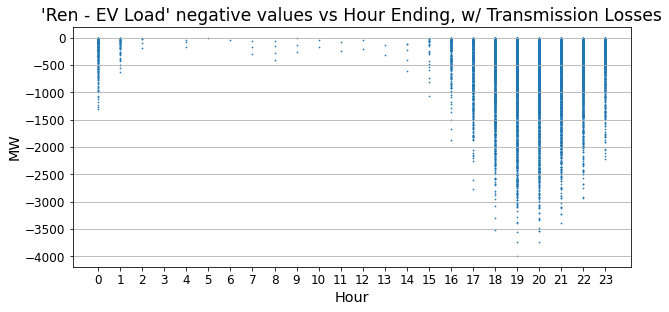

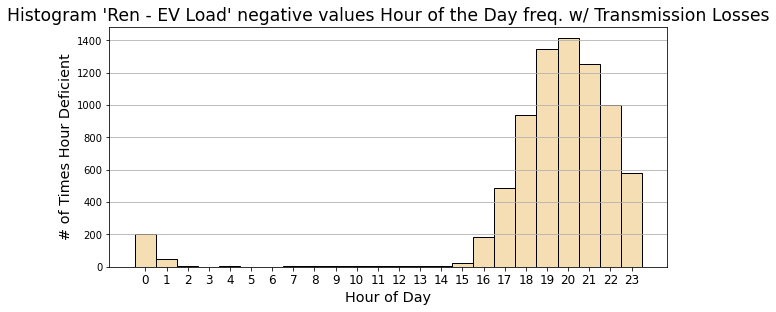

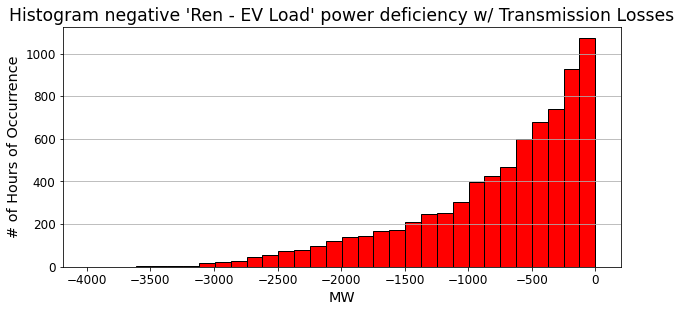

In [93]:
# First analyze without transmission losses.
# Create dataframe to work with for this cell.
neg_ren = evhr[(evhr["Wind Generation Output ct"] + evhr["Solar Generation Output ct"]\
               - evhr["EV Load ct (MWh)"]) <= 0].copy()

neg_ren["Ren - EV Load"] = neg_ren["Wind Generation Output ct"] + neg_ren["Solar Generation Output ct"]\
                            - neg_ren["EV Load ct (MWh)"]

x = neg_ren["Ren - EV Load"].mean()
y = neg_ren["Hour Ending"].mode()

# Outputs.
print("The first time that 'Ren - EV Load' is negative is: %s\n" % neg_ren.index[0])

print("The average negative 'Ren - EV Load' value is: %.2f MW\n" % x)

print("The most common hour to have a negative 'Ren - EV Load' value is hour: %.0f\n" % (y - 1))

print("The number of hours where 'Ren - EV Load' is negative is: %d\n" % neg_ren["Ren - EV Load"].size)

# --------------------
# Next analyze with transmission losses.
# Modify dataframe for transmission losses.
neg_ren = evhr[(evhr["Wind Generation Output ct"]\
                    * 0.972\
                    + evhr["Solar Generation Output ct"]\
                    * 0.972\
                    - evhr["EV Load ct (MWh)"]) <= 0].copy()

neg_ren["Ren - EV Load"] = neg_ren["Wind Generation Output ct"]\
                                * 0.972\
                                + neg_ren["Solar Generation Output ct"]\
                                * 0.972\
                                - neg_ren["EV Load ct (MWh)"].copy()

x = neg_ren["Ren - EV Load"].mean()
y = neg_ren["Hour Ending"].mode()

# Outputs.
print("The average negative 'Ren - EV Load' value, with transmission losses, is: %.2f MW\n" % x)

print("The most common hour to have a negative 'Ren - EV Load' value,\
 with transmission losses,\
 is hour: %.0f\n" % (y - 1))

print("The number of hours where 'Ren - EV Load' is negative is: %d" % neg_ren["Ren - EV Load"].size)

# Create this dataframe column for graphing.
neg_ren["Hour of Day"] = neg_ren["Hour Ending"] - 1

# display(neg_ren)

# --------------------
# Graph the negative 'Ren - EV Load' against time of day.
# Graph will include transmission losses.
# Scatter plot.
plt.figure(figsize=(10,15))
plt.subplot(3,1,1)
plt.scatter(neg_ren["Hour of Day"], neg_ren["Ren - EV Load"], s=0.5)

plt.xlabel("Hour", fontsize="x-large")
plt.ylabel("MW", fontsize="x-large")
plt.title("'Ren - EV Load' negative values vs Hour Ending, w/ Transmission Losses",\
          fontsize="xx-large")

plt.xticks(np.arange(0, 24, step=1), fontsize="large")
plt.yticks(fontsize="large")

plt.grid(axis = "y")

# --------------------
# Histogram of negative 'Ren - EV Load' hour frequency.
# Histogram will include transmission losses.
plt.figure(figsize=(10,15))
plt.subplot(3,1,2)

bins = np.arange(0, 25, 1) - 0.5
plt.hist(neg_ren["Hour of Day"], bins, edgecolor="black", color="wheat")

plt.xlabel("Hour of Day", fontsize="x-large")
plt.ylabel("# of Times Hour Deficient", fontsize="x-large")
plt.title("Histogram 'Ren - EV Load' negative values Hour of the Day freq. w/ Transmission Losses",\
          fontsize="xx-large")

plt.xticks(np.arange(0, 24, step=1), fontsize="large")
plt.grid(axis = "y")
# plt.yticks(fontsize="large")

# --------------------
# Histogram of negative 'Ren - EV Load' power deficiency.
# Histogram includes transmission losses.
plt.figure(figsize=(10,15))
plt.subplot(3,1,3)

plt.hist(neg_ren["Ren - EV Load"], bins=32, edgecolor="black", color="red")

plt.xlabel("MW", fontsize="x-large")
plt.ylabel("# of Hours of Occurrence", fontsize="x-large")
plt.title("Histogram negative 'Ren - EV Load' power deficiency w/ Transmission Losses",\
          fontsize="xx-large")

plt.xticks(np.arange(-4000, 500, step=500), fontsize="large")
plt.grid(axis = "y")
plt.yticks(fontsize="large")

# Delete variables used in cell.
del neg_ren
del x
del y

## 'Ren - EV Load' Deficit Interactive Analysis

**Used with widgets to produce interactive plot.**

<code style="background:yellow;color:black">Replicate of above section plots with widgets</code>

- Choice was to stay in pandas plots instead of attempt bokeh plots since bokeh does not has a simple histogram option.


### Renewable Adjustment Function

In [94]:
# Function to adjust Renewable values according to sliders.
def ren_adj(percent=0, percent_wind=0, percent_solar=0, percent_wind_add=0, percent_solar_add=0):    
    # Make copy of main dataframe to be worked on.
    temp = evhr.copy()
    
    # Make percent a fraction.
    percent = percent / 100
    percent_wind = percent_wind / 100
    percent_solar = percent_solar / 100  
    
    # Call the add_gen function to create compounded additional generation on percent basis.
    # Return gives separate columns for added wind and solar generation.
    gen_yearly = add_gen(percent_wind_add, percent_solar_add)
    
    # Join gen_yearly to temp.
    temp = temp.join(gen_yearly.set_index("year"), on="year")
    
    # create a dataframe of the index to be used below.
    df_ind = list(temp.index)
    
    # Make Wind Generation available for EV charging adjustment as a percentage removed from the total
    # wind generation across the hour.  Assumed that this percentage removed is used elsewhere in the grid.
    temp["Wind Generation Output ct"] = temp["Wind Generation Output ct"]\
                                            - temp["Wind Generation Output ct"]\
                                            * percent_wind\
                                            + temp["additional wind capacity ct"]\
                                            * temp["Wind Avg. Capacity Factor"]\
                                            * (1 - percent_wind)

    temp["Wind Generation Output ct min"] = temp["Wind Generation Output ct min"]\
                                            - temp["Wind Generation Output ct min"]\
                                            * percent_wind\
                                            + temp["additional wind capacity ct"]\
                                            * temp["Wind Capacity Factor min"]\
                                            * (1 - percent_wind)
    
    temp["Wind Generation Output ct max"] = temp["Wind Generation Output ct max"]\
                                            - temp["Wind Generation Output ct max"]\
                                            * percent_wind\
                                            + temp["additional wind capacity ct"]\
                                            * temp["Wind Capacity Factor max"]\
                                            * (1 - percent_wind)
    
    temp["Wind Generation Output ct 2020 cf"] = temp["Wind Generation Output ct 2020 cf"]\
                                            - temp["Wind Generation Output ct 2020 cf"]\
                                            * percent_wind\
                                            + temp["additional wind capacity ct"]\
                                            * temp["Wind Capacity Factor 2020"]\
                                            * (1 - percent_wind)
    
    # Make Solar Generation available for EV charging adjustment as a percentage removed from the total
    # solar generation across the hour.  Assumed that this percentage removed is used elsewhere in the grid.
    temp["Solar Generation Output ct"] = temp["Solar Generation Output ct"]\
                                        - temp["Solar Generation Output ct"]\
                                        * percent_solar\
                                        + temp["additional solar capacity ct"]\
                                        * temp["Solar Avg. Capacity Factor"]\
                                        * (1 - percent_solar)
    
    temp["Solar Generation Output ct min"] = temp["Solar Generation Output ct min"]\
                                        - temp["Solar Generation Output ct min"]\
                                        * percent_solar\
                                        + temp["additional solar capacity ct"]\
                                        * temp["Solar Capacity Factor min"]\
                                        * (1 - percent_solar)
    
    temp["Solar Generation Output ct max"] = temp["Solar Generation Output ct max"]\
                                        - temp["Solar Generation Output ct max"]\
                                        * percent_solar\
                                        + temp["additional solar capacity ct"]\
                                        * temp["Solar Capacity Factor max"]\
                                        * (1 - percent_solar)
    
    temp["Solar Generation Output ct 2020 cf"] = temp["Solar Generation Output ct 2020 cf"]\
                                        - temp["Solar Generation Output ct 2020 cf"]\
                                        * percent_wind\
                                        + temp["additional solar capacity ct"]\
                                        * temp["Solar Capacity Factor 2020"]\
                                        * (1 - percent_wind)
    
    # Make the load adjustment by moving a percentage of predicted EV load back 8 hours.
    # Make the load adjustment from the hours of 3-4pm to 12pm-1am.  Or if considered as "Hour Ending"
    # adjustment range is from hour ending 4pm - 1am the next day.
    # This is done after the generation adjustments for renewable generation used elsewhere.
    # To reduce lag time in the for loop we will convert the applicable dataframe column to a numpy array,
    # perform the math operations, the convert back into a pandas dataframe for plotting.  When timing the
    # difference, using this approach is around 10x faster than running the 'for' loop in the dataframe.
    
    # Use to time for loop. Programmer test code only.
#     import time
#     start = time.time()
    
    # Create a list of hours that we will be load shifting.
    time_list = list(range(16, 25))
    time_list.append(1)

    # Create numpy arrary of applicable column to speed up for loop operations.
    temp2 = temp["EV Load ct (MWh)"].to_numpy(dtype=float, copy=True)
    
    # Iterates through numpy array, load shifting when appropriate.
    for i in range(0, len(temp)):
        
        if (temp["Hour Ending"].iloc[i] in time_list) and i > 9:
            temp2[i - 9] = temp2[i - 9]\
                                + temp2[i]\
                                * percent
            temp2[i] = temp2[i]\
                        - temp2[i]\
                        * percent
            
    # Convert numpy array back to pandas dataframe, syncing indices.
    temp2 = pd.DataFrame(temp2, columns = ["EV Load ct (MWh)"])
    temp2.index =temp.index

    # Update orginal dataframe we meant to work on.
    temp["EV Load ct (MWh)"] = temp2["EV Load ct (MWh)"]
    
    # Delete the dataframe that we used for the numpy operations.
    del temp2

    # Use to time for loop. Programmer test code only.
#     end = time.time()
#     print(end - start)
    
    return temp
            

### Scatter and Histogram Plot Function

- 'for' loop uses numpy array conversion to reduce slider lag.

In [136]:
# Function to adjust 'Ren - EV load' negative values and plot histogram results.
def neg_ren_adj(percent=0, percent_wind=0, percent_solar=0, percent_wind_add=0, percent_solar_add=0):    

    # Call function to make all necessary adjustments to dataframe.
    temp = ren_adj(percent, percent_wind, percent_solar, percent_wind_add, percent_solar_add)
    
    # Make percent a fraction.
    percent = percent / 100
    percent_wind = percent_wind / 100
    percent_solar = percent_solar / 100  
    
    # --------------------
    # Next analyze with transmission losses.
    # Modify dataframe for transmission losses.
    neg_ren = temp[(temp["Wind Generation Output ct"]\
                        * 0.972\
                        + temp["Solar Generation Output ct"]\
                        * 0.972\
                        - temp["EV Load ct (MWh)"]) <= 0].copy()

    neg_ren["Ren - EV Load"] = neg_ren["Wind Generation Output ct"]\
                                    * 0.972\
                                    + neg_ren["Solar Generation Output ct"]\
                                    * 0.972\
                                    - neg_ren["EV Load ct (MWh)"].copy()

    x = neg_ren["Ren - EV Load"].mean()
    y = neg_ren["Hour Ending"].mode()
    z = neg_ren["Ren - EV Load"].min()

    # Outputs.
    print("-----------------------------------------------------------\n")
        
    print("The first time that 'Ren - EV Load', with transmission losses, is negative is: %s\n" % neg_ren.index[0])
    
    print("The average negative 'Ren - EV Load' value, with transmission losses, is: %.2f MW\n" % x)
    
    print("The most negative 'Ren - EV Load' value, with transmission losses, is: %.2f MW\n" % z)
    
    print("The most negative 'Ren - EV Load' value, with transmission losses, occurs at: %s\n"\
                                              % neg_ren["Ren - EV Load"].idxmin())

    if percent_wind < 1:
        print("The most common hour to have a negative 'Ren - EV Load' value,\
 with transmission losses,\
 is hour: %.0f\n" % (y - 1))
    else:
        print("Several hours are the most common hours to have a negative 'Ren - EV Load' value,\n\
under conditions where 100% of wind generation is used elsewhere.\n")

    print("The number of hours where 'Ren - EV Load' is negative is: %d\n" % neg_ren["Ren - EV Load"].size)
    
    print("-----------------------------------------------------------\n")

    # Create this dataframe column for graphing.
    neg_ren["Hour of Day"] = neg_ren["Hour Ending"] - 1

    # display(neg_ren)

    # --------------------
    # Graph the negative 'Ren - EV Load' against time of day.
    # Graph will include transmission losses.
    # Scatter plot.
    plt.figure(figsize=(10,20))
    plt.subplot(3,1,1)
    plt.scatter(neg_ren["Hour of Day"], neg_ren["Ren - EV Load"], s=0.5)

    plt.xlabel("Hour of Day", fontsize="x-large")
    plt.ylabel("Power Deficiency (MW)", fontsize="x-large")
    plt.title("'Ren - EV Load' Negative Values for Hour of Day,\nwith Transmission Losses",\
              fontsize="xx-large")
    plt.ylim(-5000,100)

    plt.xticks(np.arange(0, 24, step=1), fontsize="large")
    plt.yticks(fontsize="large")

    plt.grid(axis = "y")
    
    # Use to export plot image
#     plt.savefig(fname="summary1.png", bbox_inches='tight')

    # --------------------
    # Histogram of negative 'Ren - EV Load' hour frequency.
    # Histogram will include transmission losses.
    plt.figure(figsize=(10,20))
    plt.subplot(3,1,2)

    bins = np.arange(0, 25, 1) - 0.5
    plt.hist(neg_ren["Hour of Day"], bins, edgecolor="black", color="wheat")

    plt.xlabel("Hour of Day", fontsize="x-large")
    plt.ylabel("Frequency Deficient", fontsize="x-large")
    plt.title("Histogram 'Ren - EV Load' Negative Values Hour of the Day Frequency,\nwith Transmission Losses",\
              fontsize="xx-large")
    plt.ylim(0,3000)

    plt.xticks(np.arange(0, 24, step=1), fontsize="large")
    plt.grid(axis = "y")
    # plt.yticks(fontsize="large")
    
    # Set y-limits to compare graph with equal axis
    plt.ylim([0, 3000])
    
    # Use to export plot image
#     plt.savefig(fname="summary2.png", bbox_inches='tight')

    # --------------------
    # Histogram of negative 'Ren - EV Load' power deficiency.
    # Histogram includes transmission losses.
    plt.figure(figsize=(10,20))
    plt.subplot(3,1,3)

    plt.hist(neg_ren["Ren - EV Load"], bins=32, edgecolor="black", color="red")

    plt.xlabel("Power Deficiency (MW)", fontsize="x-large")
    plt.ylabel("Frequency of Occurrence (hrs)", fontsize="x-large")
    plt.title("Histogram Negative 'Ren - EV Load' Power Deficiency,\nwith Transmission Losses",\
              fontsize="xx-large")
    plt.ylim(0,3600)

    plt.xticks(np.arange(-4000, 500, step=500), fontsize="large")
    plt.grid(axis = "y")
    plt.yticks(fontsize="large")
    
    # Set y-limits to compare graph with equal axis
    plt.ylim([0, 3700])
    
    # Use to export plot image
#     plt.savefig(fname="summary3.png", bbox_inches='tight')

    # Delete variables used in cell.
    del neg_ren
    del x
    del y
    del z

### Interact Sliders for Scatter/Histogram Plot Function

<code style="background:yellow;colore:black">Slider lag is about 1.3 seconds on change, updated on mouse release.</code>

In [137]:
# Cell contains interact slider to adjust the histograms.

# Add widgets sliders to make the various adjustments.
# First slider is for in EV Load shifting.
# Second slider is for Wind Generation used elsewhere in grid than for EV Load requirements.
# Third slider if for Solar Generation used elsewhere in grid than for EV Load requirements.
interact(neg_ren_adj,\
         percent=IntSlider(min=0,\
                           max=50,\
                           step=5,\
                           continuous_update=False,\
                           description="EV Load Shifting Percent",\
                           style={'description_width': 'initial'},\
                           layout=Layout(width="400px", left="50px")
                          ),\
         percent_wind=IntSlider(min=0,\
                           max=100,\
                           step=5,\
                           continuous_update=False,\
                           description="Wind Generation used Elsewhere Percent",\
                           style={'description_width': 'initial'},\
                           layout=Layout(width="500px", left="50px")
                          ),\
         percent_solar=IntSlider(min=0,\
                           max=100,\
                           step=5,\
                           continuous_update=False,\
                           description="Solar Generation used Elsewhere Percent",\
                           style={'description_width': 'initial'},\
                           layout=Layout(width="500px", left="50px")
                          ),\
         percent_wind_add=IntSlider(min=-10,\
                           max=30,\
                           step=1,\
                           continuous_update=False,\
                           description="Wind Generation Nameplate Added percent",\
                           style={'description_width': 'initial'},\
                           layout=Layout(width="500px", left="50px")
                          ),\
         percent_solar_add=IntSlider(min=-10,\
                           max=30,\
                           step=1,\
                           continuous_update=False,\
                           description="Solar Generation Nameplate Added percent",\
                           style={'description_width': 'initial'},\
                           layout=Layout(width="500px", left="50px")
                          ),\
        ); # Adding the semi-colon prevents interact output appearing, cleaner look.

interactive(children=(IntSlider(value=0, continuous_update=False, description='EV Load Shifting Percent', layo…

# 'Ren - EV Load' Surplus Analysis

- Analyze across 24 hour periods where we have daily surplus or deficiency in 'Ren - EV Load'
- Determine if battery storage could be used to cover deficient hours, or if there are days when we have a daily net negative


In [97]:
evhr.columns

Index(['year', 'month', 'day', 'Calendar Date', 'Hour Ending', 'AIL (MWh)*',
       'AIL_Raw (MWh)*', ' Less than 5 MW DER_gas (MWh)*',
       'Less than 5 MW DER_PV (MWh)*', 'Less than 5 MW DER_Wind (MWh)*',
       'EV Load ref (MWh)', 'Number of Electric Vehicles ref',
       'Number of Electric Vehicles ct', 'EV ratio multiplier',
       'EV Load ct (MWh)', 'Solar Capacity Begin Year (MW) ref',
       'Wind Capacity Begin Year (MW) ref',
       'Solar Capacity Begin Year (MW) ct', 'Wind Capacity Begin Year (MW) ct',
       'Solar Avg. Capacity Factor', 'Solar Avg. Capacity Factor std',
       'Solar Capacity Factor min', 'Solar Capacity Factor max',
       'Solar Capacity Factor 2020', 'Wind Avg. Capacity Factor',
       'Wind Avg. Capacity Factor std', 'Wind Capacity Factor min',
       'Wind Capacity Factor max', 'Wind Capacity Factor 2020',
       'Solar Generation Output ref', 'Solar Generation Output ref min',
       'Solar Generation Output ref max',
       'Solar Generation O

In [98]:
display(evhr)

,year,month,day,Calendar Date,Hour Ending,AIL (MWh)*,AIL_Raw (MWh)*,Less than 5 MW DER_gas (MWh)*,Less than 5 MW DER_PV (MWh)*,Less than 5 MW DER_Wind (MWh)*,...,Wind Generation Output ref min,Wind Generation Output ref max,Wind Generation Output ref 2020 cf,Wind Generation Output ct,Wind Generation Output ct min,Wind Generation Output ct max,Wind Generation Output ct 2020 cf,Hour,Time,Date Time
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-01 00:00:00,2021,1,1,2021-01-01,1.0,9325.605426,9370.068492,-24.159188,0.0,-32.396111,...,215.4526,1468.9950,877.8358,959.965975,215.4526,1468.9950,877.8358,0000,00:00:00,2021-01-01 00:00:00
2021-01-01 01:00:00,2021,1,1,2021-01-01,2.0,9203.185949,9253.657741,-24.694282,0.0,-33.920634,...,238.6004,1524.1936,783.4640,997.803725,238.6004,1524.1936,783.4640,0100,01:00:00,2021-01-01 01:00:00
2021-01-01 02:00:00,2021,1,1,2021-01-01,3.0,9130.521087,9185.157278,-25.138566,0.0,-34.120225,...,215.4526,1533.0966,719.3624,969.536700,215.4526,1533.0966,719.3624,0200,02:00:00,2021-01-01 02:00:00
2021-01-01 03:00:00,2021,1,1,2021-01-01,4.0,9103.123785,9160.286283,-25.062748,0.0,-34.120225,...,226.1362,1483.2398,701.5564,972.430175,226.1362,1483.2398,701.5564,0300,03:00:00,2021-01-01 03:00:00
2021-01-01 04:00:00,2021,1,1,2021-01-01,5.0,9112.997210,9164.864530,-24.390170,0.0,-34.120225,...,226.1362,1445.8472,564.4502,973.765625,226.1362,1445.8472,564.4502,0400,04:00:00,2021-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2041-12-31 19:00:00,2041,12,31,2041-12-31,20.0,11822.672524,11459.416610,-57.046646,0.0,-42.654416,...,363.1402,3778.6210,2404.5770,2336.113514,403.1002,4194.4210,2669.1770,1900,19:00:00,2041-12-31 19:00:00
2041-12-31 20:00:00,2041,12,31,2041-12-31,21.0,11671.613022,11325.158040,-51.127376,0.0,-41.588056,...,510.3592,3577.4217,3008.1749,2453.619557,566.5192,3971.0817,3339.1949,2000,20:00:00,2041-12-31 20:00:00
2041-12-31 21:00:00,2041,12,31,2041-12-31,22.0,11406.873810,11091.460570,-49.571826,0.0,-31.457632,...,775.3534,3709.9188,3709.9188,2631.045900,860.6734,4118.1588,4118.1588,2100,21:00:00,2041-12-31 21:00:00


## Surplus Function

In [140]:
def ren_sur(percent=0, percent_wind=0, percent_solar=0, percent_wind_add=0, percent_solar_add=0):

    # Call function to make all necessary dataframe adjustments.
    temp = ren_adj(percent, percent_wind, percent_solar, percent_wind_add, percent_solar_add)

    # Make percent a fraction.
    percent = percent / 100
    percent_wind = percent_wind / 100
    percent_solar = percent_solar / 100  

    # -----------------------------------------------
    # Create a dataframe containing net daily energy.
    # This dataframe will contain daily sums for renewable energy generation and EV load daily requirements.
    # Sum the Wind Generation for each day
    temp2 = temp.groupby(["Calendar Date"]).sum()["Wind Generation Output ct"].copy()

    # Convert series to dataframe
    temp2 = temp2.to_frame()

    # Create all applicable summed columns in the dataframe temp2.
    temp2["Solar Generation Output ct"] = temp.groupby(["Calendar Date"]).sum()["Solar Generation Output ct"]

    temp2["EV Load ct (MWh)"] = temp.groupby(["Calendar Date"]).sum()["EV Load ct (MWh)"]

    temp2["Wind Generation Output ct min"] = temp.groupby(["Calendar Date"]).sum()["Wind Generation Output ct min"]

    temp2["Wind Generation Output ct max"] = temp.groupby(["Calendar Date"]).sum()["Wind Generation Output ct max"]
    
    temp2["Wind Generation Output ct 2020 cf"]\
            = temp.groupby(["Calendar Date"]).sum()["Wind Generation Output ct 2020 cf"]

    temp2["Solar Generation Output ct min"] = temp.groupby(["Calendar Date"]).sum()["Solar Generation Output ct min"]

    temp2["Solar Generation Output ct max"] = temp.groupby(["Calendar Date"]).sum()["Solar Generation Output ct max"]
    
    temp2["Solar Generation Output ct 2020 cf"]\
            = temp.groupby(["Calendar Date"]).sum()["Solar Generation Output ct 2020 cf"]

    temp2["year"] = temp.groupby(["Calendar Date"]).mean()["year"]

    temp2["year"] = temp2["year"].astype(int)

    temp2["month"] = temp.groupby(["Calendar Date"]).mean()["month"]

    temp2["month"] = temp2["month"].astype(int)

    temp2["day"] = temp.groupby(["Calendar Date"]).mean()["day"]

    temp2["day"] = temp2["day"].astype(int)

    # Create dataframe columns to plot.
    # Calculate transmission losses of 2.8% when creating columns.
    # Column created is daily results.
    temp2["Ren - EV avg"] = (temp2["Wind Generation Output ct"]\
                                + temp2["Solar Generation Output ct"])\
                                * 0.972\
                                - temp2["EV Load ct (MWh)"]

    temp2["Ren - EV min"] = (temp2["Wind Generation Output ct min"]\
                                + temp2["Solar Generation Output ct min"])\
                                * 0.972\
                                - temp2["EV Load ct (MWh)"]

    temp2["Ren - EV max"] = (temp2["Wind Generation Output ct max"]\
                                + temp2["Solar Generation Output ct max"])\
                                * 0.972\
                                - temp2["EV Load ct (MWh)"]
    temp2["Ren - EV 2020 cf"] = (temp2["Wind Generation Output ct 2020 cf"]\
                                + temp2["Solar Generation Output ct 2020 cf"])\
                                * 0.972\
                                - temp2["EV Load ct (MWh)"]

    # Convert indices into dataframe columns.
    temp2.reset_index(inplace=True)

    # -----------------------------------------------

    neg_avg = temp2[temp2["Ren - EV avg"] < 0].copy()

    neg_min = temp2[temp2["Ren - EV min"] < 0].copy()

    neg_max = temp2[temp2["Ren - EV max"] < 0].copy()
    
    neg_2020_cf = temp2[temp2["Ren - EV 2020 cf"] < 0].copy()

    print("Under average capacity factors, the number of expected daily energy deficiency days will be %d.\n"\
          % len(neg_avg))

    if len(neg_avg) > 0:
        print("The first day that there is a deficiency will be %s.\n"\
              % neg_avg["Calendar Date"].iloc[0])
        
        print("Average deficiency is %.1f.\n"\
             % neg_avg["Ren - EV avg"].mean())
        
        print("Greatest deficiency is %.1f.\n"\
             % neg_avg["Ren - EV avg"].min())
        
        neg_avg.reset_index(inplace=True)

        print("Greatest deficiency occurs on %s.\n"\
              % neg_avg["Calendar Date"].iloc[neg_avg["Ren - EV avg"].idxmin()])
        
    print("Under year 2020 capacity factors, the number of expected daily energy deficiency days will be %d.\n"\
          % len(neg_2020_cf))

    if len(neg_2020_cf) > 0:
        print("The first day this deficiency is expected to occur is %s.\n"\
              % neg_2020_cf["Calendar Date"].iloc[0])
        
        print("Average deficiency is %.1f.\n"\
              % neg_2020_cf["Ren - EV min"].mean())
        
        print("Greatest deficiency is %.1f.\n"\
             % neg_2020_cf["Ren - EV min"].min())
        
        neg_2020_cf.reset_index(inplace=True)
        
        print("Greatest deficiency occurs on %s.\n"\
          % neg_2020_cf["Calendar Date"].iloc[neg_2020_cf["Ren - EV avg"].idxmin()])

    print("Under minimun capacity factors, the number of expected daily energy deficiency days will be %d.\n"\
          % len(neg_min))

    if len(neg_min) > 0:
        print("The first day this deficiency is expected to occur is %s.\n"\
              % neg_min["Calendar Date"].iloc[0])
        
        print("Average deficiency is %.1f.\n"\
              % neg_min["Ren - EV min"].mean())
        
        print("Greatest deficiency is %.1f.\n"\
             % neg_min["Ren - EV min"].min())
        
        neg_min.reset_index(inplace=True)
        
        print("Greatest deficiency occurs on %s.\n"\
          % neg_min["Calendar Date"].iloc[neg_min["Ren - EV avg"].idxmin()])

    print("Under maximun capacity factors, the number of expected daily energy deficiency days will be %d.\n"\
          % len(neg_max))

    if len(neg_max) > 0:
        print("The first day this deficiency is expected to occur is %s.\n"\
              % neg_max["Calendar Date"].iloc[0])
        
        print("Average deficiency is %.1f.\n"\
              % neg_max["Ren - EV min"].mean())
        
        print("Greatest deficiency is %.1f.\n"\
             % neg_max["Ren - EV min"].min())
        
        neg_max.reset_index(inplace=True)
        
        print("Greatest deficiency occurs on %s.\n"\
          % neg_max["Calendar Date"].iloc[neg_max["Ren - EV avg"].idxmin()])
        
#     display(neg_avg)

    del neg_avg
    del neg_min
    del neg_max
    del neg_2020_cf
    
    # -----------------------------------------------
    

    # -----------------------------------------------
    # Create dataframe with yearly sums.
    temp3 = temp2.groupby(["year"]).sum()["Wind Generation Output ct"].copy()

    temp3 = temp3.to_frame()

    # Create all applicable summed columns in the dataframe temp3.
    temp3["Solar Generation Output ct"] = temp2.groupby(["year"]).sum()["Solar Generation Output ct"]

    temp3["EV Load ct (MWh)"] = temp2.groupby(["year"]).sum()["EV Load ct (MWh)"]

    temp3["Wind Generation Output ct min"] = temp2.groupby(["year"]).sum()["Wind Generation Output ct min"]

    temp3["Wind Generation Output ct max"] = temp2.groupby(["year"]).sum()["Wind Generation Output ct max"]
    
    temp3["Wind Generation Output ct 2020 cf"]\
            = temp2.groupby(["year"]).sum()["Wind Generation Output ct 2020 cf"]

    temp3["Solar Generation Output ct min"] = temp2.groupby(["year"]).sum()["Solar Generation Output ct min"]

    temp3["Solar Generation Output ct max"] = temp2.groupby(["year"]).sum()["Solar Generation Output ct max"]
    
    temp3["Solar Generation Output ct 2020 cf"]\
            = temp2.groupby(["year"]).sum()["Solar Generation Output ct 2020 cf"]

    temp3["Ren - EV avg"] = temp2.groupby(["year"]).sum()["Ren - EV avg"]

    temp3["Ren - EV min"] = temp2.groupby(["year"]).sum()["Ren - EV min"]

    temp3["Ren - EV max"] = temp2.groupby(["year"]).sum()["Ren - EV max"]
    
    temp3["Ren - EV 2020 cf"] = temp2.groupby(["year"]).sum()["Ren - EV 2020 cf"]

    temp3.reset_index(inplace=True)

    # -----------------------------------------------

#     temp2.set_index("Calendar Date", inplace=True)
    
    # display(temp3)
#     display(temp2)

    # Create a bokeh columndatasource to be used for plotting.
    temp2 = ColumnDataSource(temp2)

    temp3 = ColumnDataSource(temp3)

    # -----------------------
    # Create bokeh bar plot of year vs'Ren - EV Load'

    # Format the figure specifics.
    p1 = figure(height=400, width=850,
        x_range = (2020,2042),
        y_range = (-1.2e+7,3.3e+7),
        title = "Renewable Generation - EV Load Annual Forecast,\nwith 2.8% transmission losses",
        toolbar_location = "right",
    )

    # Verbical bar creation.
    p1.vbar(x=dodge('year', -0.25, range=p1.x_range),
            top="Ren - EV min",
            fill_color="yellow",
            line_alpha=0.6,
            width=0.2,
            fill_alpha=0.6,
            source=temp3,
            legend_label="Ren - EV min CF",
            )

    p1.vbar(x=dodge('year', 0, range=p1.x_range),
            top="Ren - EV avg",
            fill_color="green",
            line_alpha=0.6,
            width=0.2,
            fill_alpha=0.6,
            source=temp3,
            legend_label="Ren - EV avg CF",
            )

    p1.vbar(x=dodge('year', 0.25, range=p1.x_range),
            top="Ren - EV max",
            fill_color="blue",
            line_alpha=0.6,
            width=0.2,
            fill_alpha=0.6,
            source=temp3,
            legend_label="Ren - EV max CF",
            )
    
    p1.vbar(x=dodge('year', 0.5, range=p1.x_range),
            top="Ren - EV 2020 cf",
            fill_color="peru",
            line_alpha=0.6,
            width=0.2,
            fill_alpha=0.6,
            source=temp3,
            legend_label="Ren - EV using 2020 CF",
            )

    p1.xaxis.axis_label = "Year"
    p1.yaxis.axis_label = "Net Energy (MWh)"
    p1.legend.location = "bottom_left"
    p1.legend.orientation = "horizontal"
    p1.legend.label_text_font_size = "8pt"
    p1.background_fill_color = None
    
    # Export png for external use.
#     export_png(p1, filename="annual.png")

    # Format hovertool.
    hover = HoverTool(tooltips=[("Year: ", "@year"),
                      ("Net Energy avg: ", "@{Ren - EV avg}"),
                        ("Net Energy min: ", "@{Ren - EV min}"),
                        ("Net Energy max: ", "@{Ren - EV max}"),
                        ("Net Energy 2020 cf: ", "@{Ren - EV 2020 cf}")]
                     )

    # Add hovetool.
    p1.add_tools(hover)
    
    # -----------------------
    # Create bokeh scatter plot of day vs 'Ren - EV Load'

    # Format the figure specifics.
    p2 = figure(height=400, width=800,\
                x_axis_type = "datetime",\
                title = "Renewable Generation - EV Load Daily Forecast,\nwith 2.8% transmission losses",\
                toolbar_location = "right")
    
    p2.scatter("Calendar Date",\
              "Ren - EV avg",\
              source=temp2,\
              fill_alpha=0.6,\
               legend_label="Ren - EV avg")
    
    hover2 = HoverTool(tooltips=[("year ", "@year"),
                                 ("month", "@month"),
                                 ("day", "@day"),
                                ("Net Energy avg ", "@{Ren - EV avg}")])
    
    p2. add_tools(hover2)

    p2.xaxis.axis_label = "Date"
    p2.yaxis.axis_label = "Net Energy (MWh)"
    p2.legend.location = "top_left"
    p2.legend.orientation = "horizontal"
    
    show(column(p1, p2))

## Surplus sliders

In [141]:
# Cell contains interact slider to adjust the surplus function.

# Add widgets sliders to make the various adjustments.
# First slider is for in EV Load shifting.
# Second slider is for Wind Generation used elsewhere in grid than for EV Load requirements.
# Third slider if for Solar Generation used elsewhere in grid than for EV Load requirements.
interact(ren_sur,\
         percent=IntSlider(min=0,\
                           max=50,\
                           step=5,\
                           continuous_update=False,\
                           description="EV Load Shifting Percent",\
                           style={'description_width': 'initial'},\
                           layout=Layout(width="400px", left="50px")
                          ),\
         percent_wind=IntSlider(min=0,\
                           max=100,\
                           step=5,\
                           continuous_update=False,\
                           description="Wind Generation used Elsewhere Percent",\
                           style={'description_width': 'initial'},\
                           layout=Layout(width="500px", left="50px")
                          ),\
         percent_solar=IntSlider(min=0,\
                           max=100,\
                           step=5,\
                           continuous_update=False,\
                           description="Solar Generation used Elsewhere Percent",\
                           style={'description_width': 'initial'},\
                           layout=Layout(width="500px", left="50px")
                          ),\
         percent_wind_add=IntSlider(min=-10,\
                           max=30,\
                           step=1,\
                           continuous_update=False,\
                           description="Wind Generation Nameplate Added percent",\
                           style={'description_width': 'initial'},\
                           layout=Layout(width="500px", left="50px")
                          ),\
         percent_solar_add=IntSlider(min=-10,\
                           max=30,\
                           step=1,\
                           continuous_update=False,\
                           description="Solar Generation Nameplate Added percent",\
                           style={'description_width': 'initial'},\
                           layout=Layout(width="500px", left="50px")
                          ),\
        ); # Adding the semi-colon prevents interact output appearing, cleaner look.

interactive(children=(IntSlider(value=0, continuous_update=False, description='EV Load Shifting Percent', layo…

# Analysing Our Capacity Factors Used to Project Data

## Look at how projected data compares to historical

**Looking at the standard deviations associated with the historical capacity factor averages used.**

**Look for potential outliers in projected data by comparing with historical known data.**

## Historical Average CF Standard Deviations

**Discussion Below**

**Note that CF range is [0,1]**

*Regarding below cell analysis.*

- Below analysis looks at Renewable cf standard deviations from the historical data which was originally average from several years to give the hourly Renewable cfs for each hour in the year.  These cfs were then used to project hourly renewable generation from available capacity.

- The below analysis shows that on average solar cf has lower variance than average wind cf, which contains roughly 2x the variance on average in comparison.

- Min solar CF variance = 0 is due to overnight hours without sunlight.

- Both solar and wind contain hours where standard deviation is roughly 50% of the respective CF.

- The average standard deviations suggest that solar is generally more consistent than wind.

Conclusion:

    Forecasting hourly wind and solar generation using historical hourly average capacity factors will provide a "big picture" overview of available renewable power in the province.  However, projecting renewable generation in this manner will overlook outlier events (ie. wind does not blow, or wind cf > 0.9).
    
    Outlier events will occur more frequently for wind generation than for solar generation according to the average standard deviations.  However, both sources of renewable energy will contain hours where actual generation is off by roughly a 50% cf for the specific hour.
    
        This indicates that projecting hourly renewable generation in this manner can give a general overview, but will contain significant errors on outlier hours within the projected data.  If these outlier hours result in actual renewable deficiencies from predicted then the required load will likely have to be serviced by thermal generation or energy storage.
        
**This may or may not be necessary for report**

In [101]:
# isinstance(cf, pd.DataFrame)
# display(cf)
# cf.head()

# Print out various data regarding the standard deviations from the historical Capacity Factors.

print("Wind CF max standard deviation is: %.3f\n" % max(cf["Wind Avg. Capacity Factor std"]))
print("Wind CF min standard deviation is: %.3f\n" % min(cf["Wind Avg. Capacity Factor std"]))

print("Solar CF max standard deviation is: %.3f\n" % max(cf["Solar Avg. Capacity Factor std"]))
print("Solar CF min standard deviation is: %.3f\n" % min(cf["Solar Avg. Capacity Factor std"]))

print("Wind CF average standard deviation is: %.3f\n" % cf["Wind Avg. Capacity Factor std"].mean())
print("Solar CF average standard deviation is: %.3f\n" % cf["Solar Avg. Capacity Factor std"].mean())

print("When 'Solar std = 0' is removed from the analysis:\n")

cf1 = cf[cf["Solar Avg. Capacity Factor std"] != 0].copy()

print("New Solar CF min standard deviation is: %.5f\n" % min(cf1["Solar Avg. Capacity Factor std"]))

print("New Solar CF average standard deviation is: %.3f\n" % cf1["Solar Avg. Capacity Factor std"].mean())

del cf1

Wind CF max standard deviation is: 0.530

Wind CF min standard deviation is: 0.017

Solar CF max standard deviation is: 0.488

Solar CF min standard deviation is: 0.000

Wind CF average standard deviation is: 0.234

Solar CF average standard deviation is: 0.077

When 'Solar std = 0' is removed from the analysis:

New Solar CF min standard deviation is: 0.00045

New Solar CF average standard deviation is: 0.142



# Analyzing AESO's EV Daily Loading Profile

**Objectives of this section:**

- Determine how the AESO EV daily loading profile is created.
- Determine scenarios where EV loading profile can be changed.
- Quantify the loading profile changes.

## AESO's daily EV Load Daily Spread by Hour

*Idea is to investigate if each hour of the day is generally attributed to the same daily EV Load percentage.*

All years of forecasted hours are analyzed.

,EV Load percent of day std
Hour,
0000,0.008873
0100,0.006643
0150,0.001074
0200,0.005621
0300,0.003905
0400,0.006454
0500,0.005896
0600,0.003428
0700,0.003907


EV Load percent of day std max: 0.0109

EV Load percent of day std min: 0.0011

EV Load percent of day std average: 0.0067



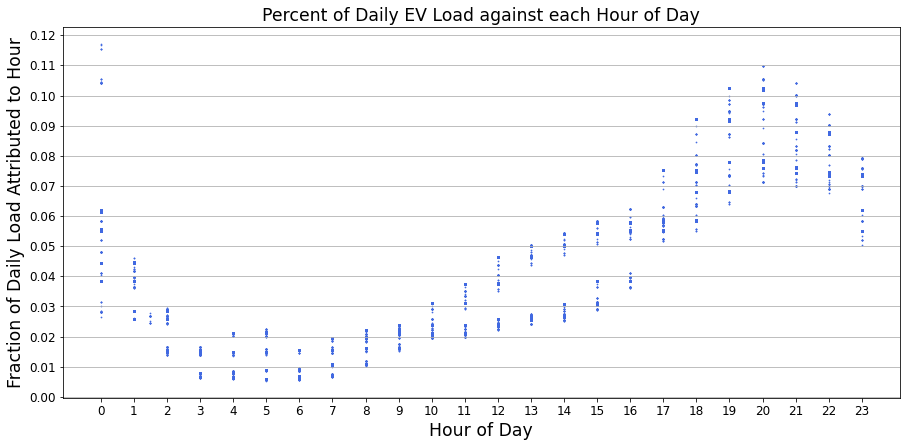

In [102]:
# Sum the daily EV loads.
temp1 = evhr.groupby(["Calendar Date"]).sum()["EV Load ct (MWh)"]
temp1 = temp1.to_frame()
temp1.rename(columns = {"EV Load ct (MWh)":"EV Load ct daily sum (MWh)"}, inplace=True)

# Join summed EV loads, from above snippet, to new DataFrame column in main DataFrame.
temp2 = evhr.copy()
temp2 = temp2.join(temp1, on="Calendar Date")

# Create a column that gives percentage (as decimal) of Hourly EV load across the day.
# i.e 'EV Load ct (MWh)' / 'EV Load ct daily sum (MWh)' = 'EV Load percent of day'
temp2["EV Load percent of day"] = temp2["EV Load ct (MWh)"] / temp2["EV Load ct daily sum (MWh)"]

# Create a dataframe containing "EV load percent of day" standard deviations for each hour in the day.
# Low variance for this dataframe column would suggest consistency with how AESO spreads
# EV Load across the 24 hour period.
temp3 = temp2.groupby("Hour").std()["EV Load percent of day"]
temp3 = temp3.to_frame()
temp3.rename(columns = {"EV Load percent of day":"EV Load percent of day std"}, inplace=True)

# All 24 hours will be displayed as output.
# REMINDER: Hour = 0150 is used to represent November dailight savings time double hour. 
display(temp3)

# Outputs of note.
print("EV Load percent of day std max: %.4f\n" % temp3["EV Load percent of day std"].max())
print("EV Load percent of day std min: %.4f\n" % temp3["EV Load percent of day std"].min())
print("EV Load percent of day std average: %.4f\n" % temp3["EV Load percent of day std"].mean())

# Create dataframe column for plotting.
temp2["Hour of Day"] = temp2["Hour Ending"] - 1

# --------------
# Scatter plot the hourly percent of daily load.
plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
plt.scatter(temp2["Hour of Day"], temp2["EV Load percent of day"], s=0.5, color="royalblue")

plt.xlabel("Hour of Day", fontsize="xx-large")
plt.ylabel("Fraction of Daily Load Attributed to Hour", fontsize="xx-large")
plt.title("Percent of Daily EV Load against each Hour of Day", fontsize="xx-large")

plt.xticks(np.arange(0, 24, step=1), fontsize="large")
plt.yticks(np.arange(0, 0.13, step=0.01), fontsize="large")

plt.grid(axis = "y")

# --------------
# plt.figure(figsize=(15,15))
# plt.subplot(2,1,2)
# plt.pie(temp2["Hour of Day"], temp2["EV Load percent of day"])

# plt.xlabel("Hour of Day", fontsize="xx-large")
# plt.ylabel("Fraction of Daily Load Attributed to Hour", fontsize="xx-large")
# plt.title("Percent of Daily EV Load against each Hour of Day", fontsize="xx-large")

# plt.xticks(np.arange(0, 24, step=1), fontsize="large")
# plt.yticks(np.arange(0, 0.13, step=0.01), fontsize="large")

# plt.grid(axis = "y")

# Delete dataframe objects after use
del temp1
del temp2
del temp3